# MSP Data science'24


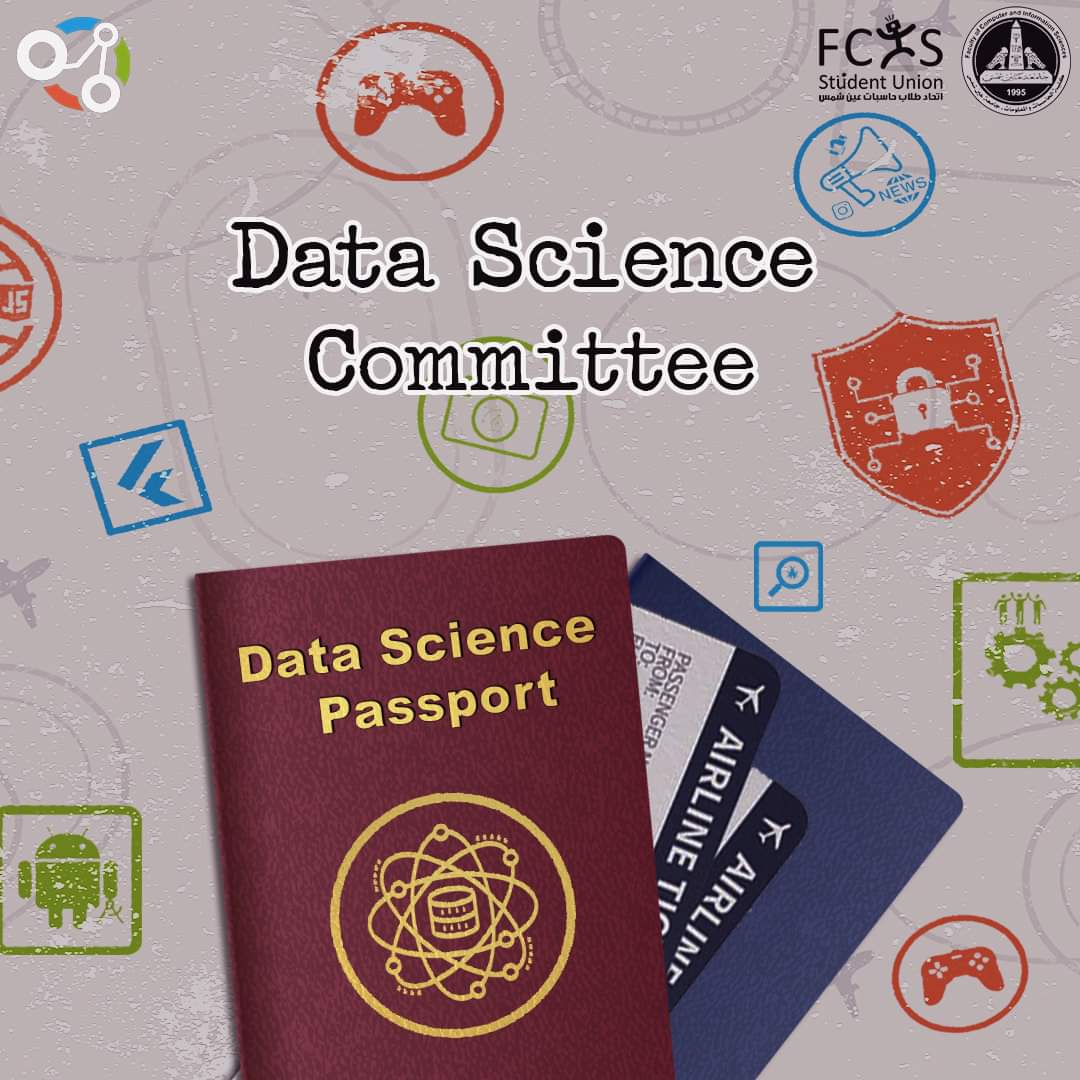

## Why are time seires special?

- Time Series Data:
We have a dataset that records the number of ice cream cones sold each day over a period of time, along with the corresponding temperature on each day.
The goal is to predict the number of ice cream cones sold on future days based on historical sales data and temperature patterns.
In this case, the data exhibits time series characteristics because it is recorded over time, with each observation corresponding to a specific day.
The graph of ice cream cone sales over time will show fluctuations and patterns that occur daily, weekly, or seasonally, making it a time series.
- Non-Time Series Data:
We have another dataset that records the number of ice cream cones sold at different ice cream shops across different cities, along with the temperature at each location.
The goal is to predict the number of ice cream cones sold at a particular shop given the temperature, without considering the temporal aspect (day-to-day variations).
In this case, the data does not exhibit time series characteristics because there is no temporal ordering of the observations.
The graph of ice cream cone sales versus temperature will show a relationship between the two variables but without the time-dependent fluctuations seen in the time series data.


## Manipulate time series 

In [42]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 

#### wer first time series

- we'll create a week of data, iterate over the result, and obtain the dayofweek and day_name() for each date.

In [43]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


#### Create a time series of air quality data
- how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

- a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017).

In [44]:
import matplotlib.pylab as plt 
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64

data['date']= pd.to_datetime(data['date'])
# Set date column as index
data.set_index('date',inplace=True)

# Inspect data 
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


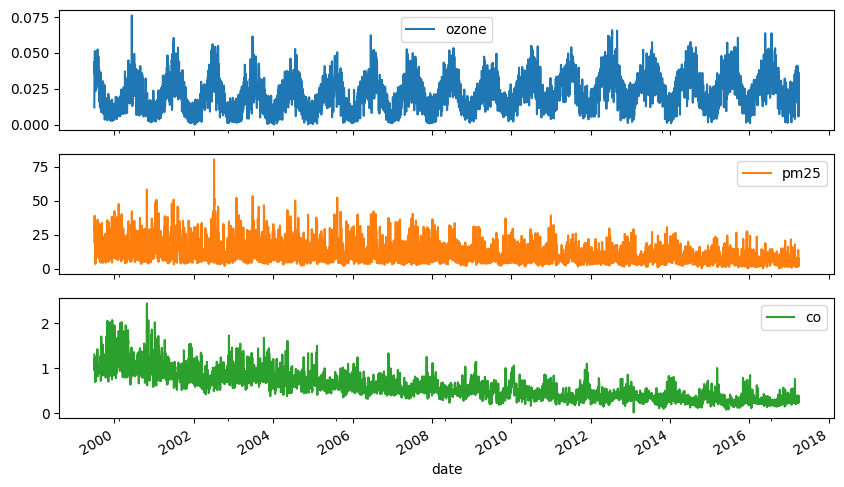

In [45]:
# Set figure size using rcParams
plt.rcParams['figure.figsize'] = (10, 6)  # Adjust width and height as needed

# Plot subplots
data.plot(subplots=True)

# Show the plot
plt.show()

#### Compare annual stock price trends
-  select sub-periods from a time series.

- compare the performance for three years of Yahoo stock prices.

date  price
0  2013-01-02  20.08
1  2013-01-03  19.78
2  2013-01-04  19.86
3  2013-01-07  19.40
4  2013-01-08  19.66

2013   2014   2015
0    20.08    NaN    NaN
1    19.78  39.59  50.17
2    19.86  40.12  49.13
3    19.40  39.93  49.21
4    19.66  40.92  48.59
..     ...    ...    ...
256  40.65    NaN    NaN
257  40.49  50.86  33.60
258  40.20  50.53  34.04
259  40.44  51.22  33.37
260    NaN  50.51  33.26

[261 rows x 3 columns]

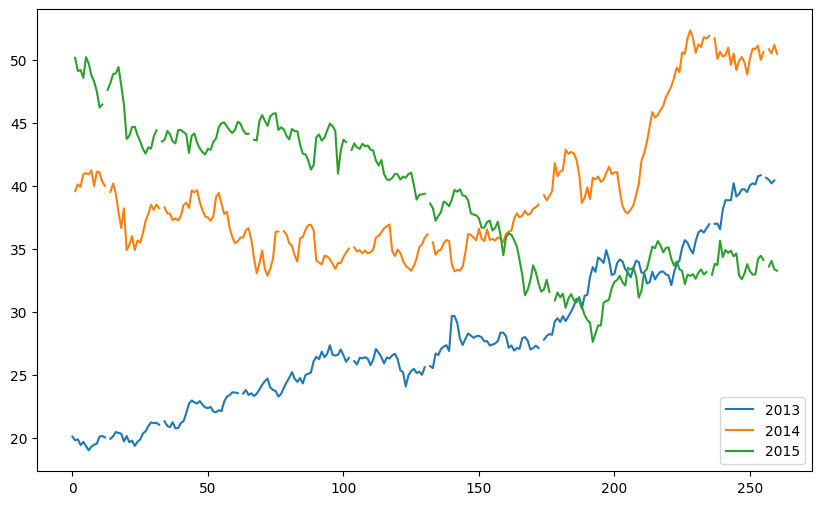

In [46]:
yahoo = pd.read_csv('yahoo.csv')
display(yahoo.head())
yahoo['date']= pd.to_datetime(yahoo['date'])
# Set date column as index
yahoo.set_index('date',inplace=True)
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
display(prices)
prices.plot()
plt.show()


#### Set and change time series frequency
- how to assign a frequency to a DateTimeIndex, and then change this frequency.

- data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

- we'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


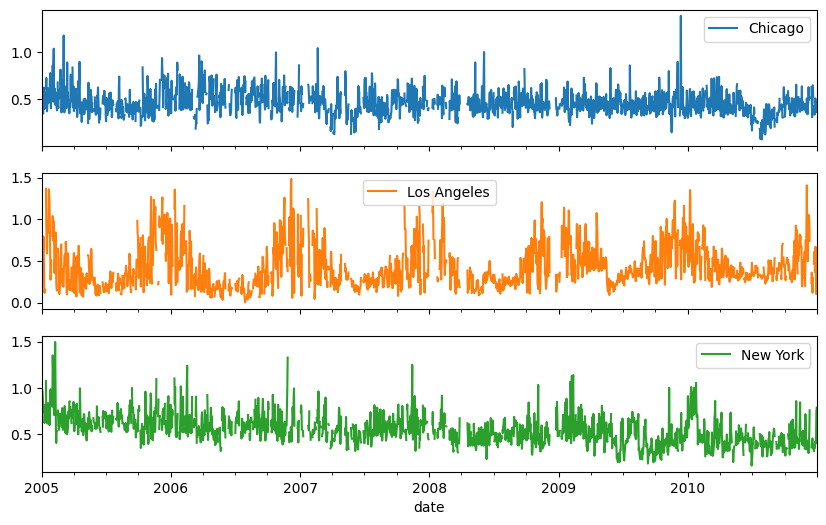

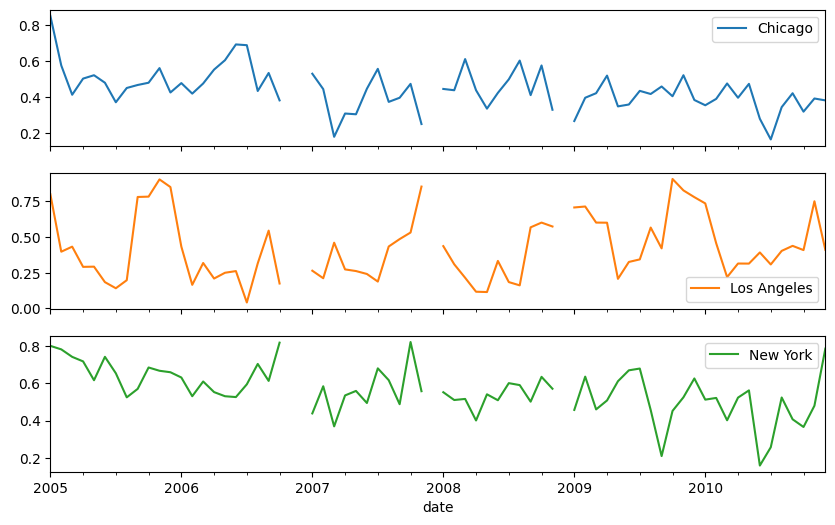

In [47]:
co = pd.read_csv('co_cities.csv')
co['date']= pd.to_datetime(co['date'] )
co.set_index('date', inplace=True)
# Inspect data
print(co.info())
# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data

co.plot(subplots=True)

plt.show()
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show()



#### Shifting stock prices across time
- The first method to manipulate time series was .shift(), which allows we shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

- Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

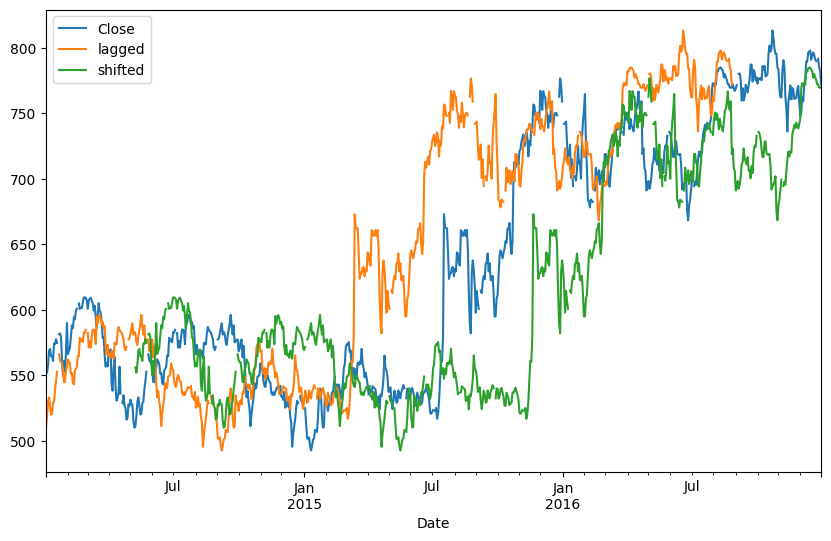

In [48]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'],index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()



#### Calculating stock price changes
- how to calculate returns using current and shifted prices as input.
- practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

In [49]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'],  index_col='date')
yahoo = yahoo.asfreq("B")

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
display(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64

0.0    703
dtype: int64


#### Plotting multi-period returns
- .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

- We'll be using Google stock prices from 2014-2016.

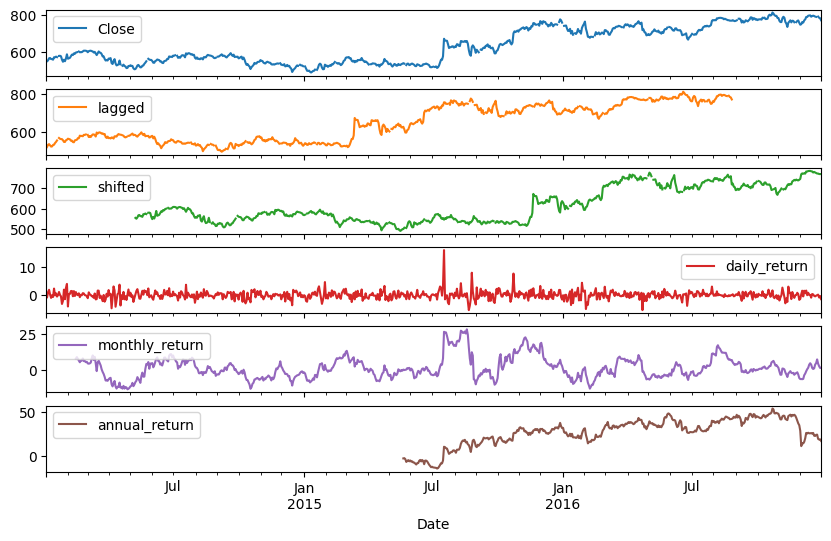

In [50]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result

google.plot(subplots=True)
plt.show()


In [51]:

# Sample data
example = {'A': [10, 20, 15, 25, 30, 35, 40, 45]}
df = pd.DataFrame(example)

# Calculate percentage change using .pct_change()
pct_change = df['A'].pct_change(periods=2) * 100

# Calculate percentage change using .diff() and division
diff_pct_change = (df['A'].diff(periods=2) / df['A'].shift(2)) * 100

# Print results
print("Using .pct_change():")
print(pct_change)

print("\nUsing .diff() and division:")
print(diff_pct_change)


Using .pct_change():
0           NaN
1           NaN
2     50.000000
3     25.000000
4    100.000000
5     40.000000
6     33.333333
7     28.571429
Name: A, dtype: float64

Using .diff() and division:
0           NaN
1           NaN
2     50.000000
3     25.000000
4    100.000000
5     40.000000
6     33.333333
7     28.571429
Name: A, dtype: float64


#### Compare the performance of several asset classes
- how we can easily compare several time series by normalizing their starting points to 100, and plot the result.

- To broaden wer perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


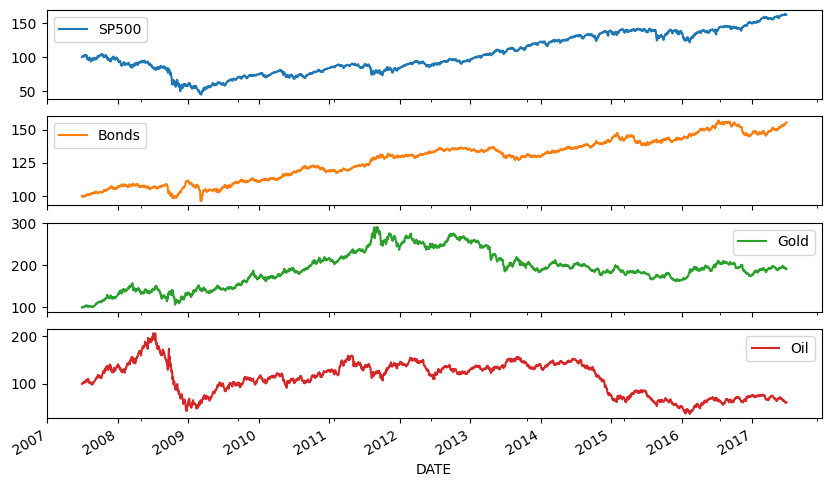

In [52]:
# Import data here
prices = pd.read_csv('asset_classes.csv',parse_dates=['DATE'], index_col='DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(subplots=True)
plt.show()


#### Plot performance difference vs benchmark index
-  how to calculate and plot the performance difference of a stock in percentage points relative to a benchmark index.

- Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

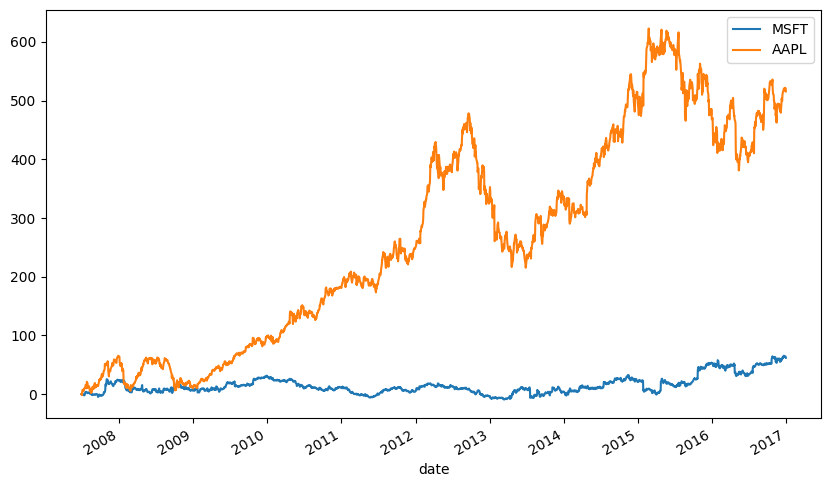

In [53]:
# Create tickers
tickers = ['MSFT','AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
sp_stocks = pd.concat([stocks,sp500],axis=1).dropna()

# Normalize data
normalized = sp_stocks.div(sp_stocks.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()

#### Convert monthly to weekly data
-  how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

- Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [54]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start= start,end= end,freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
display(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start= start,end= end, freq='W')

# Print monthly, reindexed using weekly_dates
display(monthly.reindex(weekly_dates))
display(monthly.reindex(weekly_dates, method='bfill'))
display(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64

#### Create weekly from monthly unemployment data
- The civilian US unemployment rate is reported monthly. we may need more frequent data, but that's no problem because we just learned how to upsample a time series.

- we'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

            UNRATE
DATE              
2010-01-03     NaN
2010-01-10     NaN
2010-01-17     NaN
2010-01-24     NaN
2010-01-31     NaN
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8
            UNRATE
DATE              
2010-01-03     9.8
2010-01-10     9.8
2010-01-17     9.8
2010-01-24     9.8
2010-01-31     9.8


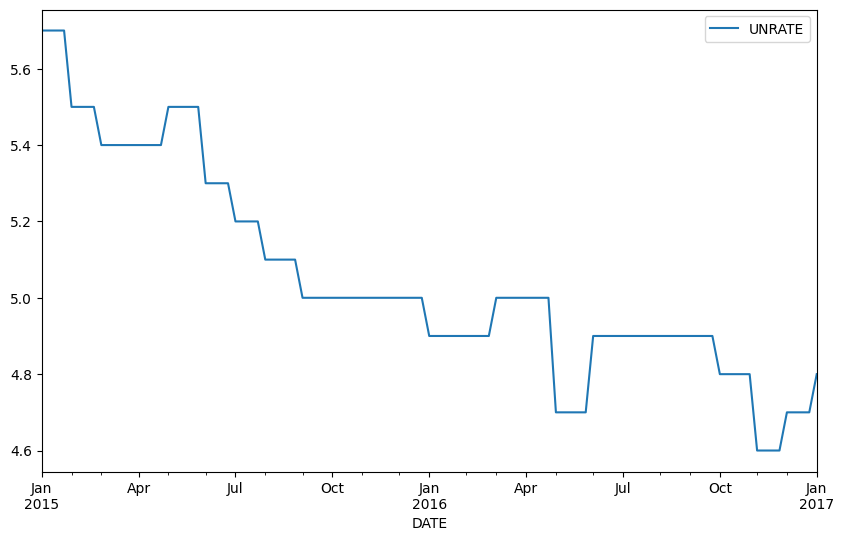

In [55]:
# Import data here
unrate = pd.read_csv('unrate.csv', parse_dates=['DATE'], index_col='DATE')

# Show first five rows of weekly series
print(unrate.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(unrate.asfreq('W',method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = unrate.asfreq('W',method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 

weekly_ffill.loc['2015':].plot()
plt.show()

#### Use interpolation to create weekly employment data
- we have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

- Compare wer previous approach to the new .interpolate() method that we learned about in this video.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB
None


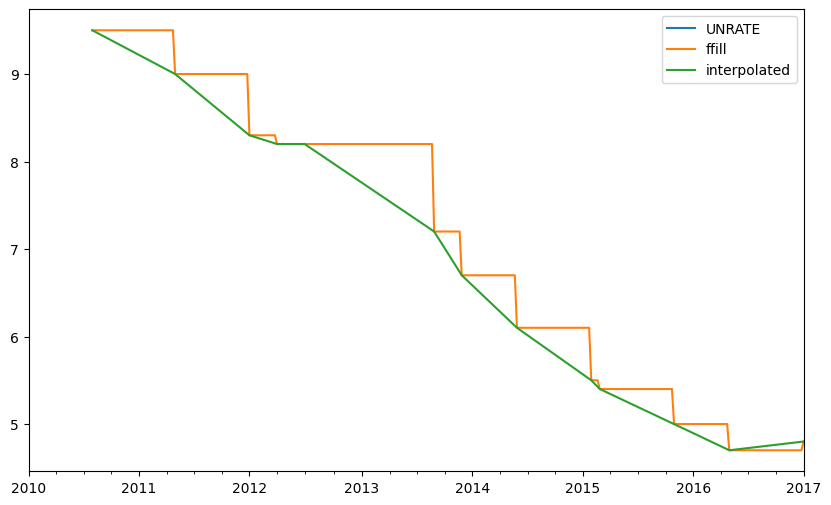

In [56]:
monthly= unrate.asfreq('MS')
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start= monthly.index.min(), end = monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

# Plot weekly
weekly.plot()
plt.show()


#### Compare weekly, monthly and annual stocks trends for MSFT & APPL
- we have seen in the video how to downsample and aggregate time series on air quality.

- First, we'll apply downsample and aggregate time series to stocks data for for MSFT & APPL to compare the trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2007-01-03 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   MSFT    2517 non-null   float64
dtypes: float64(2)
memory usage: 59.0 KB
None


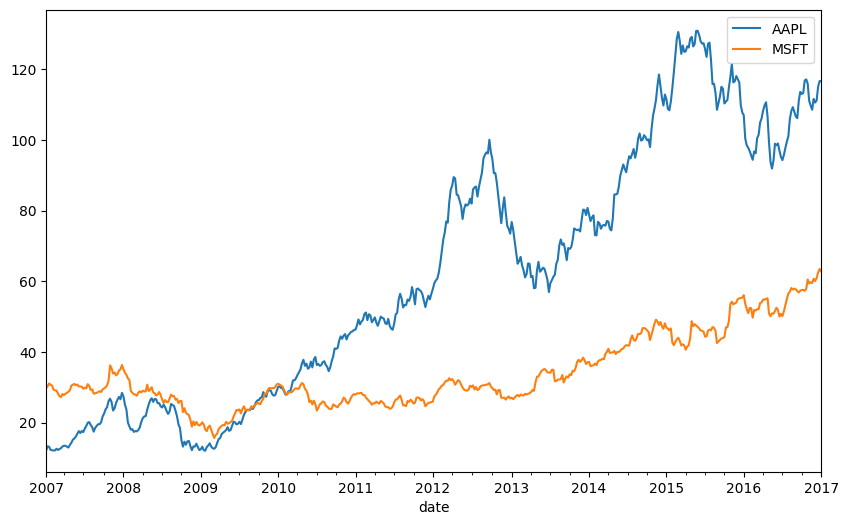

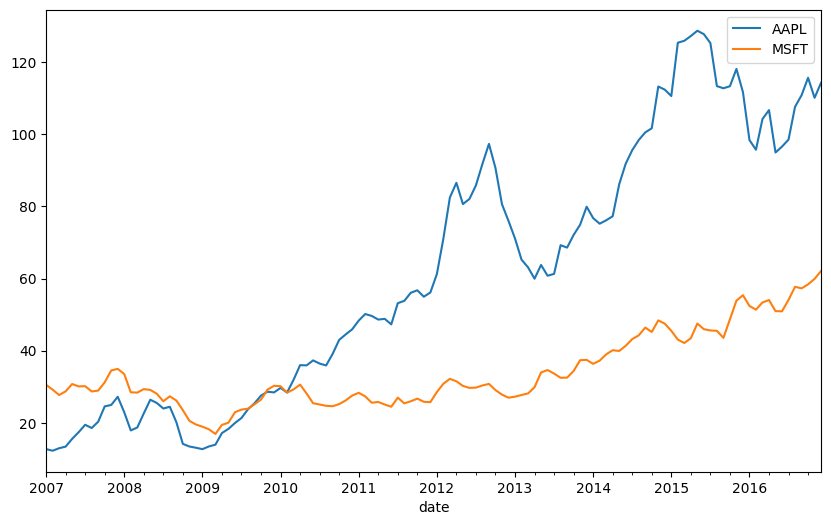

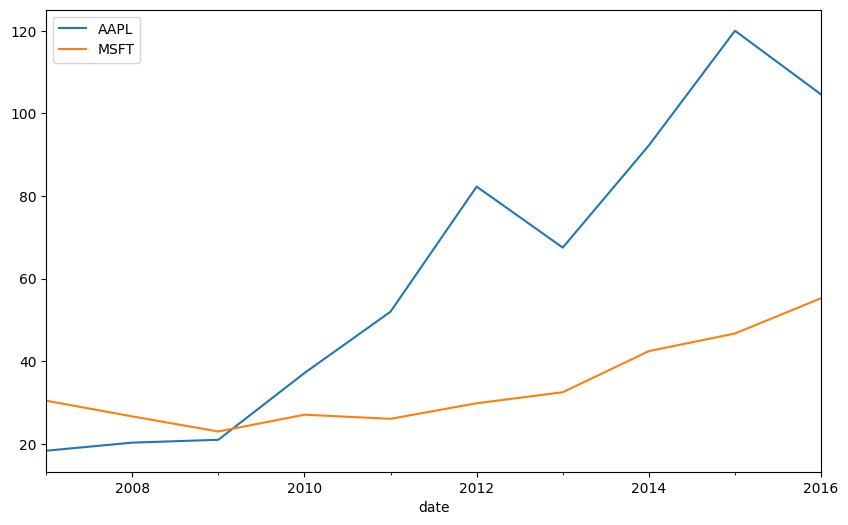

In [57]:
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

print(stocks.info())

# Calculate and plot the weekly average ozone trend
stocks.resample('W').mean().plot()
plt.show()


# Calculate and plot the monthly average ozone trend

stocks.resample('M').mean().plot()
plt.show()

# Calculate and plot the annual average ozone trend
stocks.resample('A').mean().plot()
plt.show()



#### GDP growth rate:
- refers to the percentage change in the Gross Domestic Product (GDP) of a country over a specific period of time, usually measured annually or quarterly.

#### Compare quarterly GDP growth rate and stock returns
- With wer new skill to downsample and aggregate time series, we can compare higher-frequency stock price series to lower-frequency economic time series.

- As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) google
- GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, we'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None


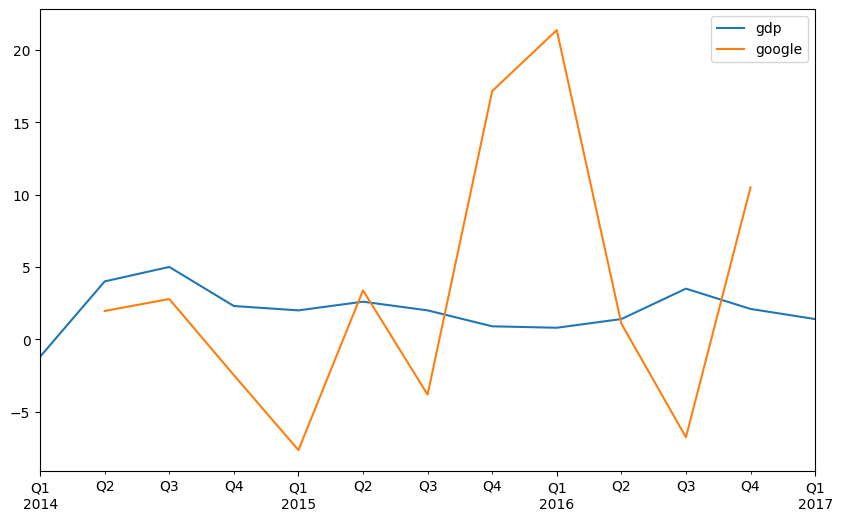

In [58]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())
gdp_growth_14 = gdp_growth.loc["2014-1-1":]
google = pd.read_csv('google.csv', parse_dates=['Date'],index_col='Date')

# Calculate djia quarterly returns here 
google_quarterly = google.resample('QS').first()
google_quarterly_return = google_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
gpd_gog = pd.concat([gdp_growth_14, google_quarterly_return], axis=1)
gpd_gog.columns=['gdp','google']
gpd_gog.plot()
plt.show()



#### Visualize monthly mean, median and standard deviation of S&P500 returns
-  how to calculate several aggregate statistics from upsampled data.

- Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB
None


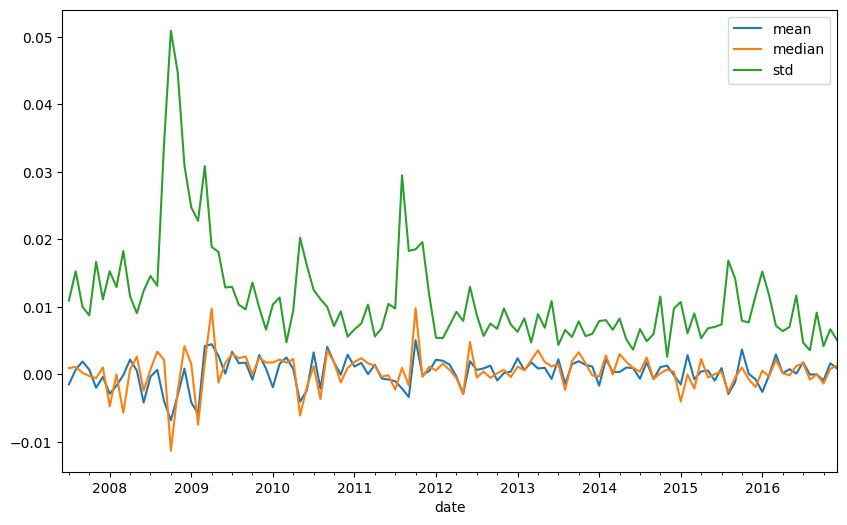

In [59]:
# Import data here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col ='date')
print(sp500.info())
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean','median','std'])

# Plot stats here
stats.plot()
plt.show()


- rolling():
Calculates rolling window statistics over a fixed-size window of time without changing the frequency of the data.
- resample():
Changes the frequency of the data by aggregating it over a specified time period, allowing for upsampling or downsampling.

#### Rolling average air quality since 2010 for new york city
-  rolling window functions.

In [60]:
data.head()

ozone       pm25        co
date                                     
1999-07-01  0.012024  20.000000  1.300686
1999-07-02  0.027699  23.900000  0.958194
1999-07-03  0.043969  36.700000  1.194444
1999-07-04  0.035161  39.000000  1.081548
1999-07-05  0.038359  28.171429  0.939583

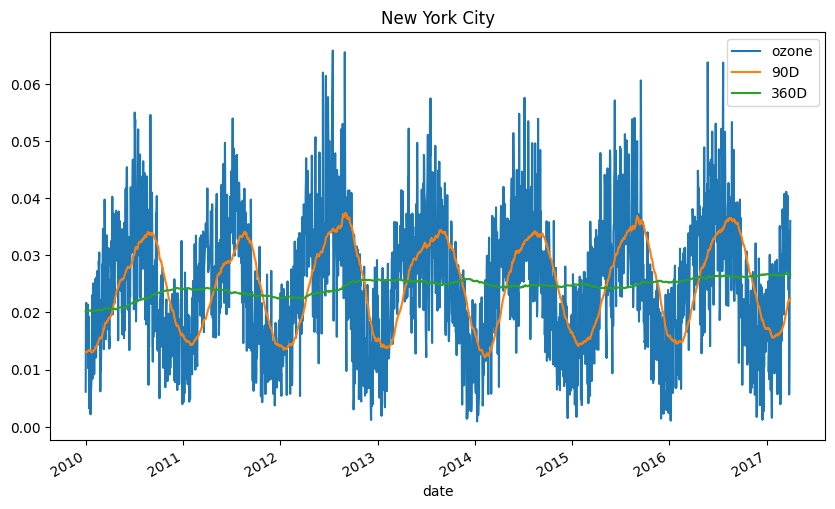

In [61]:
ozone = data.drop(['pm25','co'], axis=1)
# Calculate 90d and 360d rolling mean for the last price
ozone['90D'] = data.ozone.rolling(window='90D').mean()
ozone['360D'] = data.ozone.rolling(window='360D').mean()

# Plot data
ozone.loc['2010':].plot()
plt.title('New York City')
plt.show()


#### Rolling 360-day median & std. deviation for nyc ozone data since 2000
- how to calculate several rolling statistics using the .agg() method, similar to .groupby().

- Let's take a closer look at the air quality history of NYC using the Ozone data we have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

- we'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.

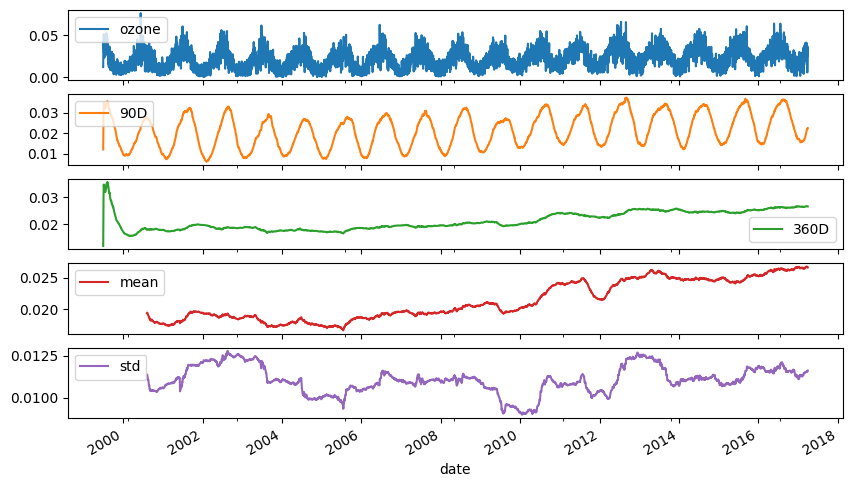

In [64]:
# Calculate the rolling mean and std here
rolling_stats = ozone.ozone.rolling(360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = ozone.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()


#### Rolling quantiles for daily air quality in nyc
- how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

- Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 455.4 KB
None


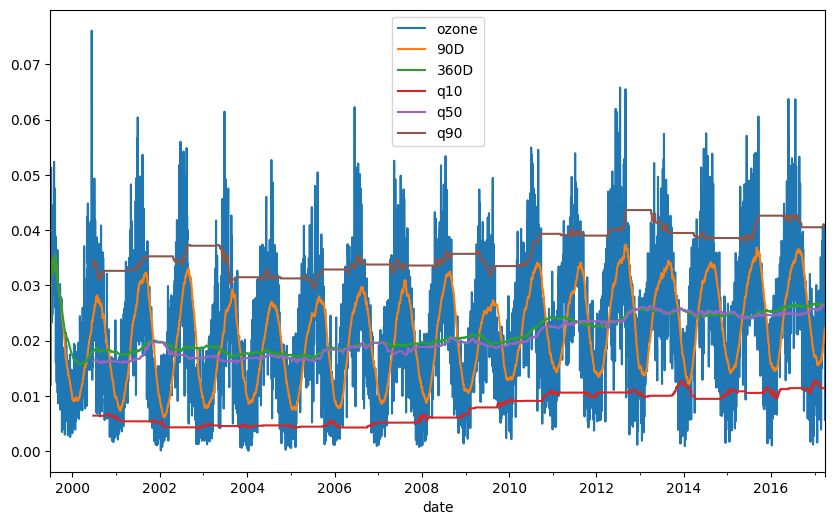

In [66]:
# Resample, interpolate and inspect ozone data here
ozone = ozone.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = ozone.rolling(360)['ozone']

# Insert the rolling quantiles to the monthly returns
ozone['q10'] = rolling.quantile(0.1)
ozone['q50'] = rolling.quantile(0.5)
ozone['q90'] = rolling.quantile(0.9)

# Plot the data
ozone.plot()
plt.show()


#### Cumulative sum vs .diff()
- expanding windows that allow we to run cumulative calculations.

- The cumulative sum method has in fact the opposite effect of the .diff() method that we came across

- To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.

In [67]:
data = pd.read_csv('google.csv', parse_dates=['Date'],index_col='Date')
data = data.resample('D').interpolate()

# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

True


#### Cumulative return on $1,000 invested in microsoft vs apple I
- To put wer new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Microsoft or Apple ('AAPL') in 2007.

- - Adding 1 to the returns effectively converts the returns to a format suitable for calculating cumulative returns. This is because when we multiply the cumulative returns by the daily returns, we want to start with a value of 1 for the cumulative return. Adding 1 to each daily return achieves this.

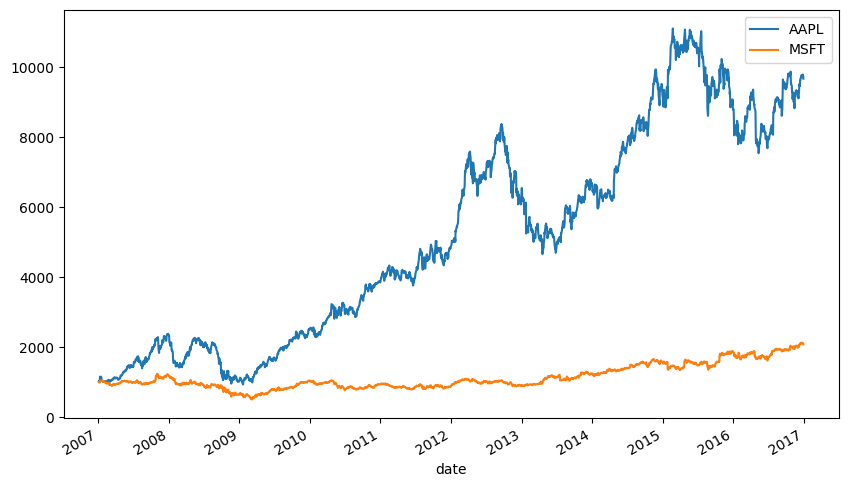

In [68]:
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')
# Define wer investment
investment = 1000

# Calculate the daily returns here
returns = stocks.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns+1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 

cumulative_return.mul(investment).plot()
plt.show()

#### Cumulative return on $1,000 invested in microsoft vs apple II
- Apple outperformed microsoft over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

- To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

- - Subtracting 1:
After computing the cumulative product, subtracting 1 adjusts the result to obtain the total return over the entire period. This step is necessary because the cumulative product includes the initial value of 1. Subtracting 1 effectively removes this initial value and gives us the total return over the entire period.

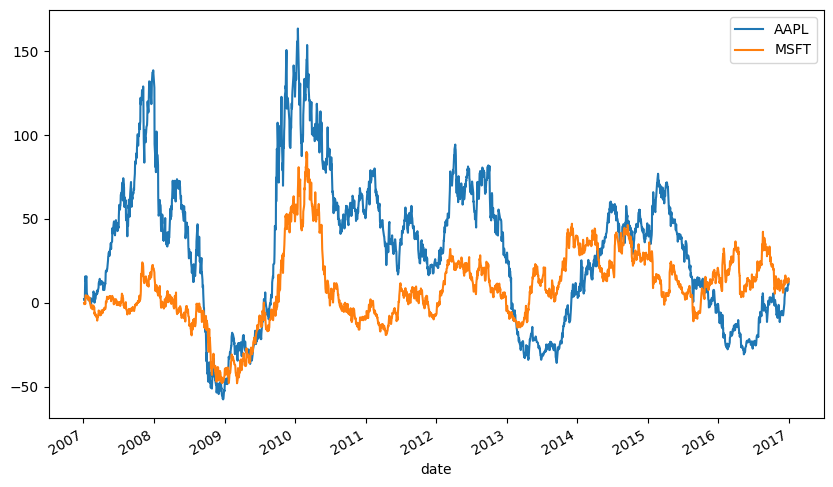

In [69]:
import numpy as np 
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns+1)-1
    
# Calculate daily returns
daily_returns = stocks.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()

#### Random Walk :
- In time series analysis, a random walk is a stochastic process where future values are determined by adding random shocks to the current value, resulting in a sequence of unpredictable fluctuations over time. It assumes that each observation is a random deviation from the previous observation, making it challenging to forecast future values based solely on past data. Random walks are often used as a null model or a benchmark in analyzing financial and economic time series data.

#### Random walk I
-  how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

- In this exercise, we'll build wer own random walk by drawing random numbers from the normal distribution with the help of numpy.

In [70]:
import numpy as np

# Example DataFrame representing daily closing prices of a stock
dates = pd.date_range(start='2022-01-01', end='2022-01-10')
prices = [100, 102, 101, 105, 104, 108, 107, 110, 109, 111]
fb = pd.DataFrame({'price': prices}, index=dates)
# Calculate daily returns
daily_returns = fb['price'].pct_change().dropna()

# Get the number of observations
n_obs = daily_returns.count()

# Generate a random walk
np.random.seed(42)
random_walk = np.random.choice(daily_returns, size=n_obs)
print("Daily Returns:")
print(daily_returns)

print("\nRandom Walk:")
print(random_walk)


Daily Returns:
2022-01-02    0.020000
2022-01-03   -0.009804
2022-01-04    0.039604
2022-01-05   -0.009524
2022-01-06    0.038462
2022-01-07   -0.009259
2022-01-08    0.028037
2022-01-09   -0.009091
2022-01-10    0.018349
Freq: D, Name: price, dtype: float64

Random Walk:
[ 0.02803738 -0.00952381 -0.00909091  0.03846154  0.02803738  0.03960396
  0.02803738 -0.00909091  0.03846154]


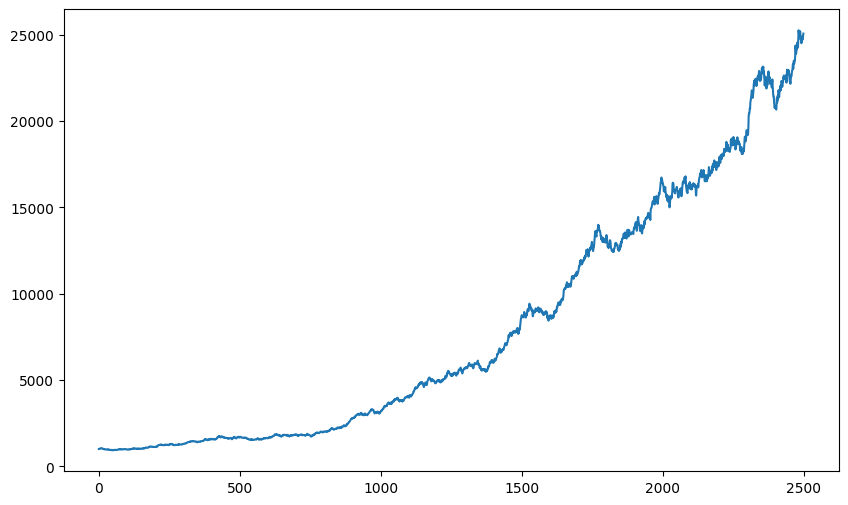

In [71]:
from numpy.random import seed, normal

# Set seed here
seed(42)

# Create random_walk
random_walk = normal(loc=0.001, scale=0.01,size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here

random_prices.mul(1000).plot()
plt.show()

#### Random walk II
-  how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

- In this exercise, we'll build a random walk using historical returns from Yahoo's stock price since IPO 

date
2013-01-03    0.000000
2013-01-04    0.008233
2013-01-07   -0.017775
2013-01-08   -0.001139
2013-01-09    0.008578
                ...   
2015-12-25   -0.016785
2015-12-28    0.004521
2015-12-29    0.007492
2015-12-30   -0.016821
2015-12-31    0.015445
Length: 781, dtype: float64

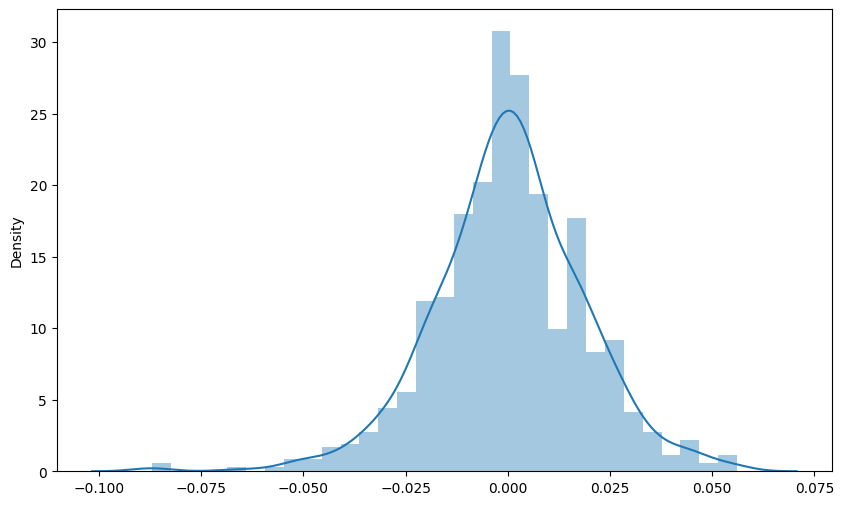

In [77]:
from numpy.random import choice
import seaborn as sns

# Set seed here
seed(42)
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'],  index_col='date')
# Calculate daily_returns here
daily_returns = yahoo.pct_change().dropna()
# Get n_obs
n_obs = len(daily_returns)

# Create random_walk
random_walk = choice(daily_returns.values.flatten(), size=n_obs)
random_walk = pd.Series(random_walk, index=daily_returns.index)
display(random_walk)
# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()

#### Random walk III
- In this exercise, we'll complete wer random walk simulation using yahoo stock returns over the last five years. we'll start off with a random sample of returns and use it to create a random stock price path.

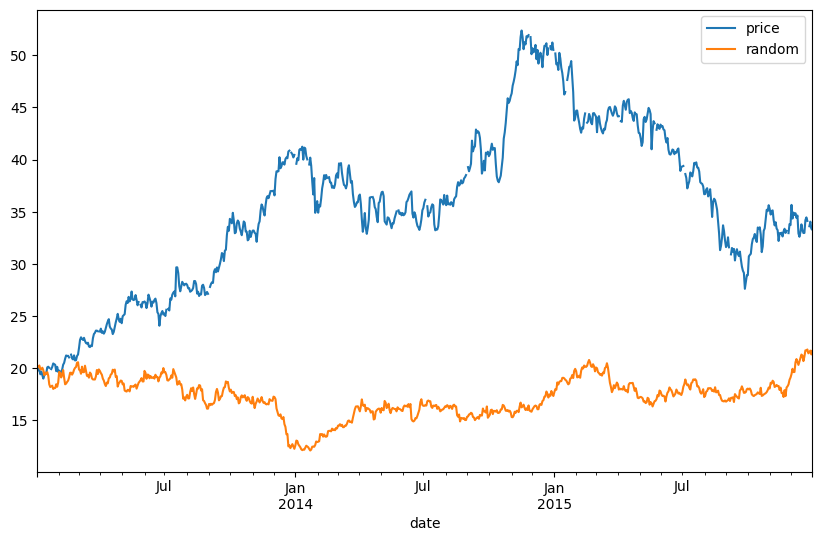

In [78]:
# Select fb start price here
start = yahoo.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)

# Append the random walk values to the start Series
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
yahoo['random'] = random_price

yahoo.plot()
plt.show()


## Time series  analysis 

#### Flying Saucers Aren't Correlated to Flying Markets
- Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when we look at the correlation of say, two stocks, we should look at the correlation of their returns and not their levels.

- To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.



In [80]:
ufo = pd.read_csv("UFO.csv", index_col='Date', parse_dates=['Date'])
dji =  pd.read_csv('DJI.csv', index_col='Date', parse_dates=['Date'])
levels = pd.merge(ufo, dji, right_index=True, left_index=True)
levels.columns =['UFO', 'DJI']
levels.head()

UFO     DJI
Date                   
1941-01-01    1  110.96
1942-01-01    2  119.40
1943-01-01    9  135.89
1944-01-01    9  152.32
1945-01-01    9  192.91

In [81]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


#### Looking at a Regression's R-Squared
- R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

- we will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

- we will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the 
 in the regression 
). To include a constant using the function OLS(), we need to add a column of 1's to the right hand side of the regression.

In [82]:
import re

# Open the file
with open('y.txt', 'r') as file:
    # Read lines
    lines = file.readlines()

    # Initialize empty lists for index and data
  
    y = []

    # Iterate over each line
    for line in lines:
        # Use regular expression to split by any whitespace characters
        parts = re.split(r'\s+', line.strip(), maxsplit=1)

        # Extract index and data
        y.append(float(parts[1]))

# Now we have the index and data in separate lists
# we can process them as needed
y= pd.Series(y)
print(y)


0     -0.835
1     -0.061
2     -0.195
3     -2.461
4      1.040
       ...  
995   -1.017
996   -0.431
997    1.990
998   -1.172
999   -1.566
Length: 1000, dtype: float64


In [83]:
import re

# Open the file
with open('x.txt', 'r') as file:
    # Read lines
    lines = file.readlines()

    # Initialize empty lists for index and data
    
    x = []

    # Iterate over each line
    for line in lines:
        # Use regular expression to split by any whitespace characters
        parts = re.split(r'\s+', line.strip(), maxsplit=1)

        # Extract index and data
        x.append(float(parts[1]) )

# Now we have the index and data in separate lists
# we can process them as needed
x= pd.Series(x)
print(x)


0      1.2810
1     -0.6126
2      0.9332
3      2.2690
4     -1.4280
        ...  
995    1.0890
996    0.7437
997   -1.6120
998    1.0110
999    1.5720
Length: 1000, dtype: float64


In [84]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)
display(dfx1.head())
display("#"*50)
# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.90


const       x
0    1.0  1.2810
1    1.0 -0.6126
2    1.0  0.9332
3    1.0  2.2690
4    1.0 -1.4280

'##################################################'

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:48:06   Log-Likelihood:                -560.12
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.013     -0.391      0.6

#### A Popular Strategy Using Autocorrelation
- One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

- This simple idea is actually the basis for a popular hedge fund strategy.

- we'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. we'll start with a DataFrame MSFT of daily prices. we should use the .resample() method to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method only works on Series, not DataFrames (even DataFrames with one column), so we will have to select the column in the DataFrame.

In [85]:
MSFT = pd.read_csv("MSFT.csv", index_col='Date', parse_dates=True)
# Convert the daily data to weekly data
MSFT = MSFT.resample('W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()


# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


#### Are Interest Rates Autocorrelated?
- When we look at daily changes in interest rates, the autocorrelation is close to zero. However, if we resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell we anything about interest rates tomorrow, but a move in interest rates over a year can tell we something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

In [86]:
# Open the file
with open('daily_rates.txt', 'r') as file:
    # Read lines
    lines = file.readlines()

    # Initialize empty lists for index and data
  
    US10Y = []
    DATE = []

    # Iterate over each line
    for line in lines:
        # Use regular expression to split by any whitespace characters
        parts = re.split(r'\s+', line.strip(), maxsplit=1)

        # Extract index and data
        US10Y.append(float(parts[1]))
        DATE.append(parts[0])

# Now we have the index and data in separate lists
# we can process them as needed
daily_rates= pd.DataFrame({'DATE':DATE, 'US10Y':US10Y})
daily_rates.set_index("DATE", inplace=True)
daily_rates.index = pd.to_datetime(daily_rates.index)
print(daily_rates.head())

            US10Y
DATE             
1962-01-02   4.06
1962-01-03   4.03
1962-01-04   3.99
1962-01-05   4.02
1962-01-08   4.03


In [87]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample('A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


#### Autocorrelation in time series data
- In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

- It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

##### Interpret autocorrelation plots
- If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

- In order to help we asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, we can assume that the observed autocorrelation value is statistically significant.

- In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

#### Taxing Exercise: Compute the ACF
- we computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. 

- we will compute the array of autocorrelations for the H&R Block quarterly earnings that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. This plot shows what the autocorrelation function looks like for cyclical earnings data. The ACF at lag=0 is always one, of course.

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


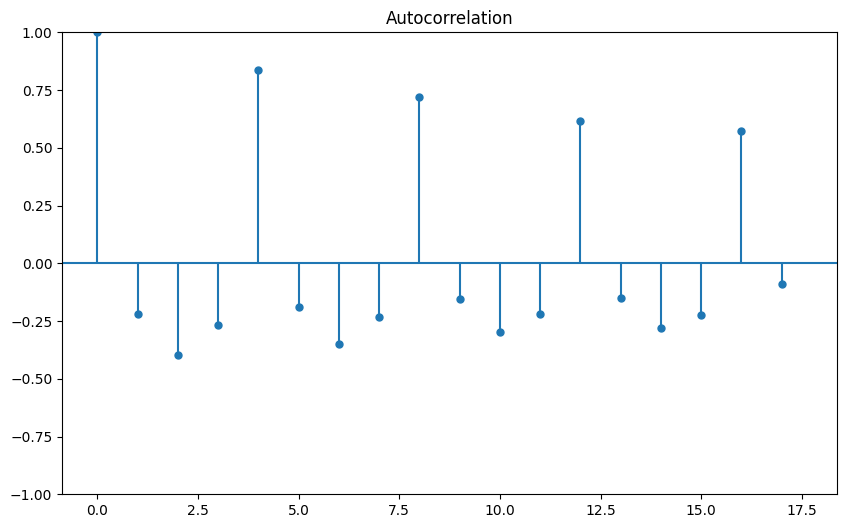

In [88]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
HRB = pd.read_csv("HRB.csv", index_col='Quarter', parse_dates=True)
# Import the acf module and the plot_acf module from statsmodels


# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

#### Are We Confident This Stock is Mean Reverting?
- we saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can we say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

- Even if the true autocorrelations were zero at all lags, in a finite sample of returns we won't see the estimate of the autocorrelations exactly zero.

- we will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 The weekly returns 

In [89]:
MSFT = pd.read_csv("MSFT.csv", index_col='Date', parse_dates=True)
# Convert the daily data to weekly data
MSFT = MSFT.resample('W').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()
returns.dropna(inplace=True)

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


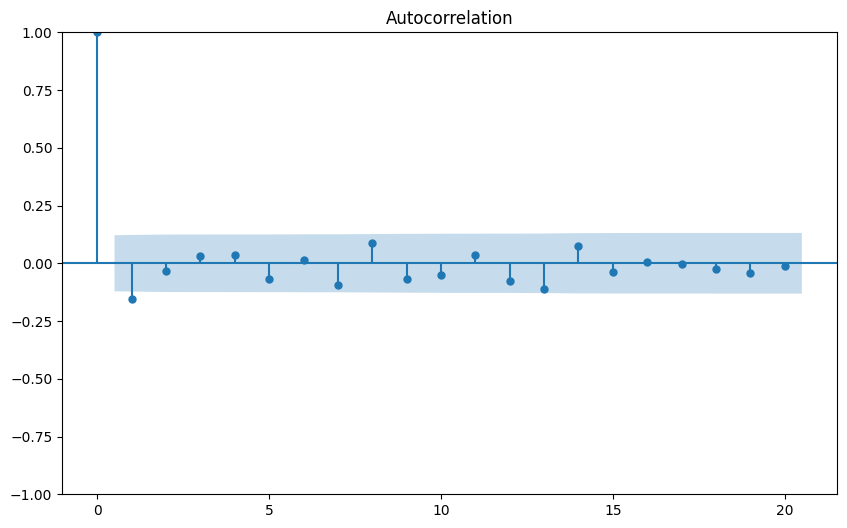

In [90]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

#### Can't Forecast White Noise
- A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

- we will generate a white noise series and plot the autocorrelation function to show that it is zero for all lags. we can use np.random.normal() to generate random returns. For a Gaussian white noise process, the mean and standard deviation describe the entire process.

- Plot this white noise series to see what it looks like, and then plot the autocorrelation function.

The mean is 0.022 and the standard deviation is 0.050


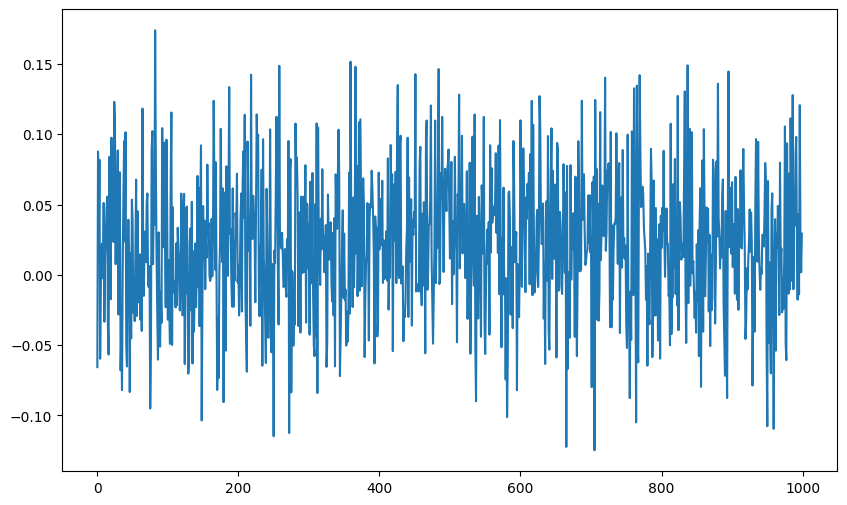

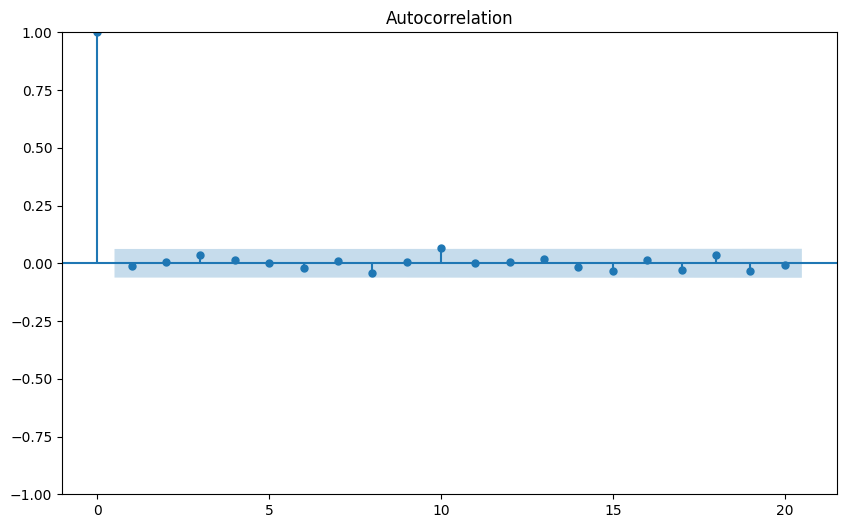

In [91]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np 
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))
# Plot returns series
plt.plot(returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

#### Generate a Random Walk
- Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

- we will simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount. Then, plot the simulated stock price. If we hit the "Run Code" code button multiple times, we'll see several realizations.

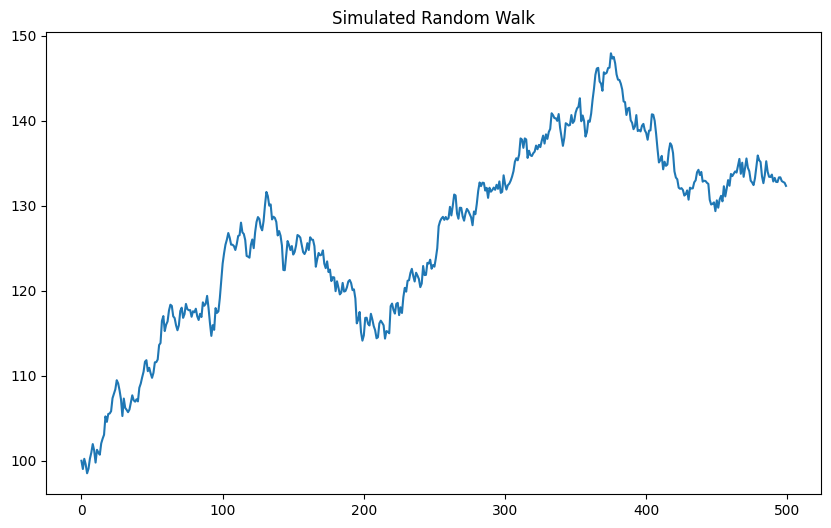

In [92]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

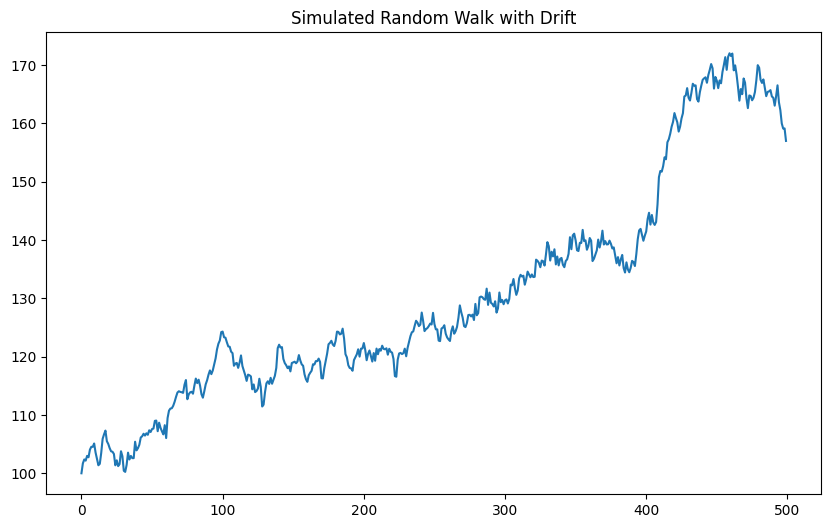

In [93]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

#### Are Stock Prices a Random Walk?
- Most stock prices follow a random walk (perhaps with a drift). we will look at a time series of Microsoft stock prices, pre-loaded in the DataFrame MSFT, and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.

- With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [95]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(MSFT['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(0.527634488571854, 0.9856892582563027, 1, 259, {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}, 832.0857227547677)
The p-value of the test on prices is: 0.9856892582563027


#### How About Stock Returns?
- we showed that Microsoft stock prices, contained in the DataFrame MSFT follow a random walk. In this exercise. we will do the same thing for microsoft returns (percent change in prices) and show that the returns do not follow a random walk.



In [96]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
MSFT_ret = MSFT.pct_change()

# Eliminate the NaN in the first row of returns
MSFT_ret = MSFT_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(MSFT_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.0238804729679003e-30


#### Seasonal Adjustment During Tax Season
- Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

- we saw earlier that by taking first differences of a random walk, we get a stationary white noise process. For seasonal adjustments, instead of taking first differences, we will take differences with a lag corresponding to the periodicity.

- Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,… because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


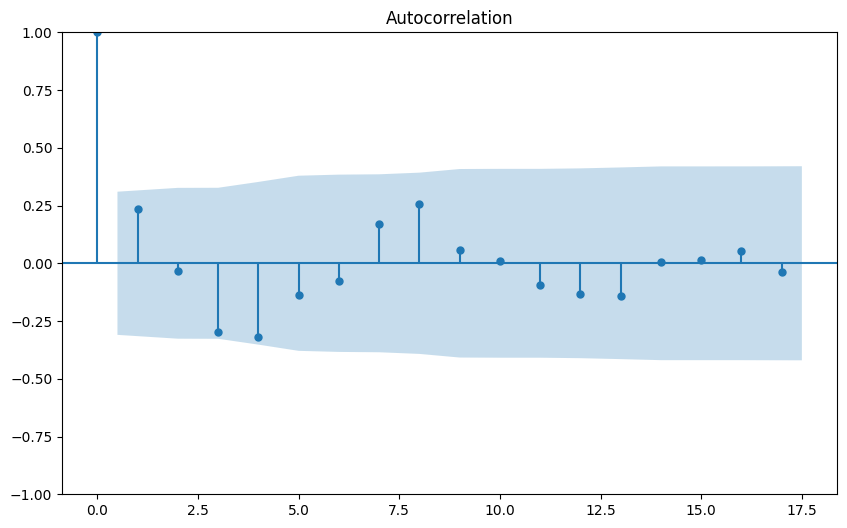

In [97]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

In [99]:
# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv("ch1_discoveries.txt", header=0, sep=',')

# Display the first five lines of the DataFrame
discoveries.head()


date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0

In [100]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


#### wer first plot!
- Let's take everything we have learned so far and plot wer first time series plot. we will set the groundwork by producing a time series plot of wer data and labeling the axes of wer plot, as this makes the plot more readable and interpretable for the intended audience.


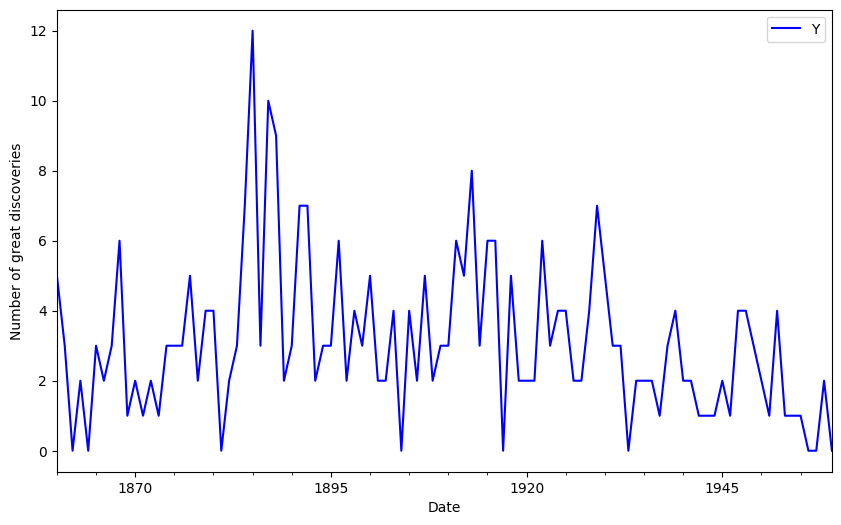

In [101]:
import matplotlib.pylab as plt
# Set the date column as the index of wer DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in wer DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in wer plot
ax.set_xlabel('Date')

# Specify the y-axis label in wer plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

#### Specify plot styles
- The matplotlib library also comes with a number of built-in stylesheets that allow we to customize the appearance of wer plots. To use a particular style sheet for wer plots, we can use the command plt.style.use(wer_stylesheet) where wer_stylesheet is the name of the style sheet.

- In order to see the list of available style sheets that can be used, we can use the command print(plt.style.available). 

In [102]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


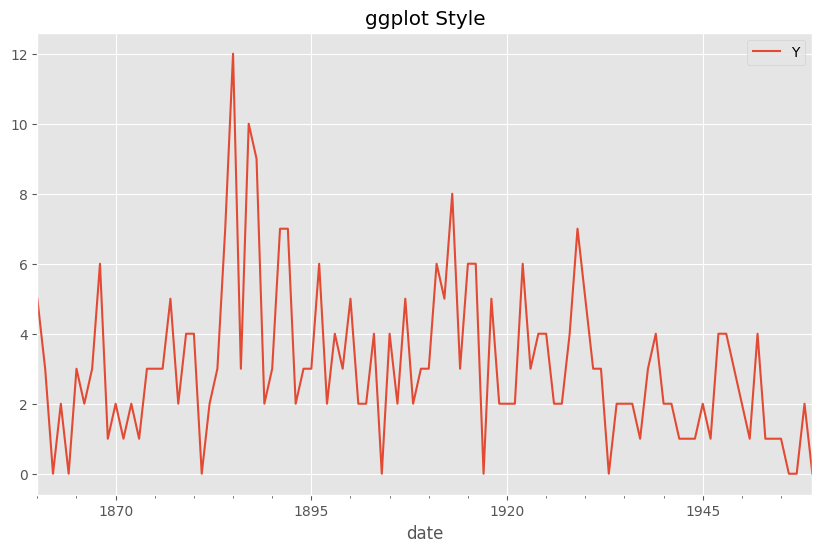

In [103]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

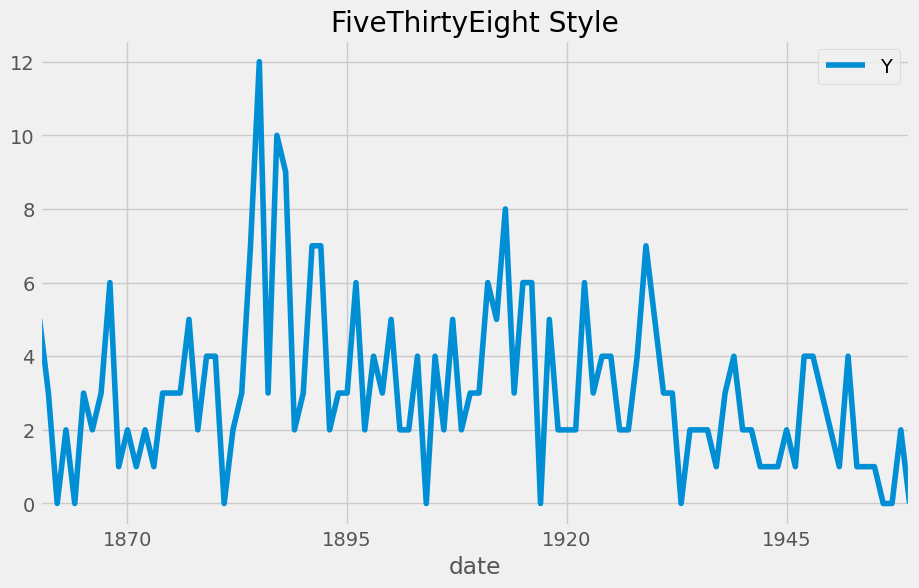

In [104]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

#### Display and label plots
- As we saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the .plot() method allows we to specify various other parameters to tailor wer time series plot (color of the lines, width of the lines and figure size).

- we may have noticed the use of the notation ax = df.plot(...) and wondered about the purpose of the ax object. This is because the plot function returns a matplotlib AxesSubplot object, and it is common practice to assign this returned object to a variable called ax. Doing so also allows we to include additional notations and specifications to wer plot such as axis labels.

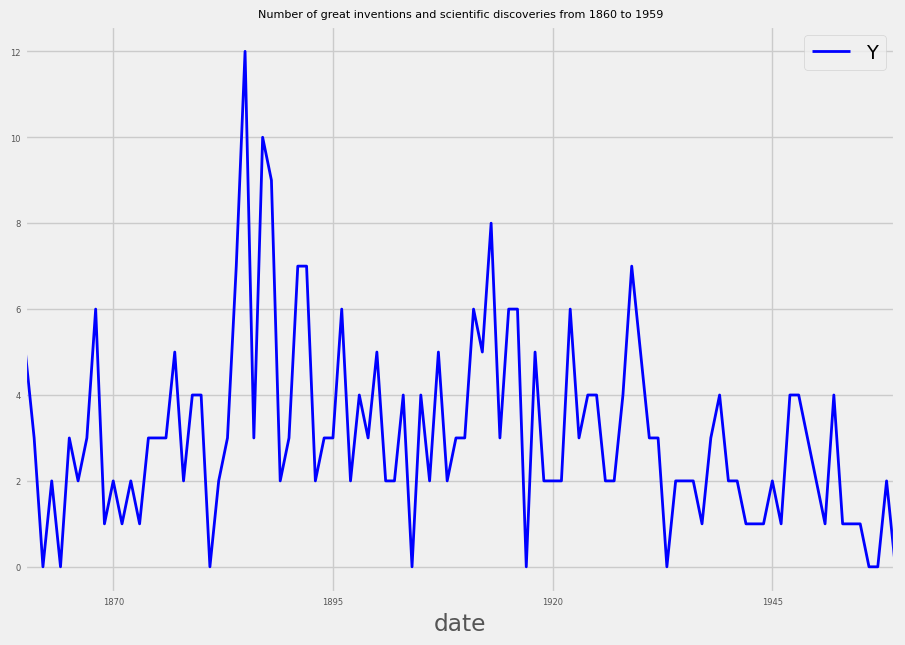

In [105]:
plt.style.use('fivethirtyeight')
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(10, 7), linewidth=2, fontsize=6)

# Specify the title in wer plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

#### Subset time series data
- When plotting time series data, we may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow we to extract specific portions of a DataFrame. For example, we can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range:

- subset_data = discoveries['1950-01-01':'1960-01-01']
- Note: Subsetting wer data this way is only possible if the index of wer DataFrame contains dates of the datetime type. Failing that, the pandas library will return an error message

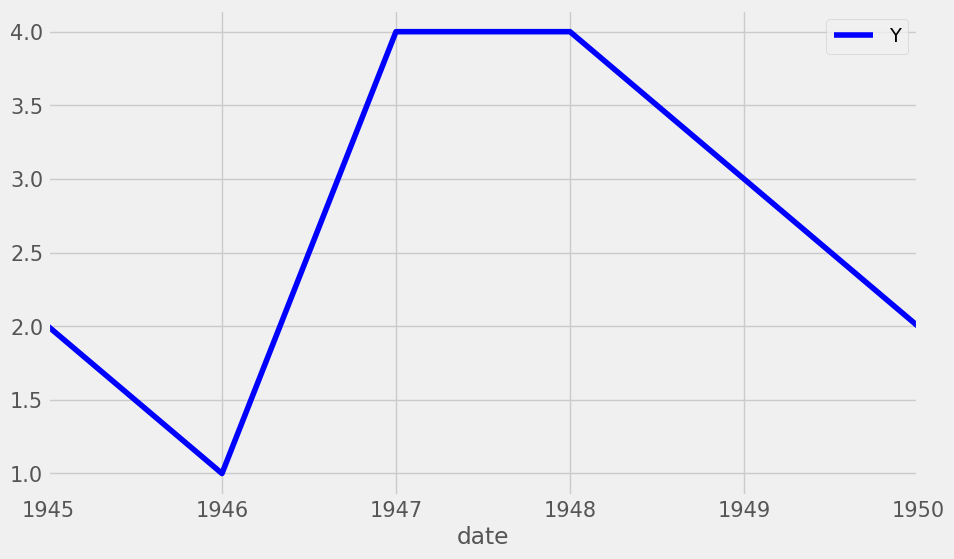

In [106]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in wer DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show()

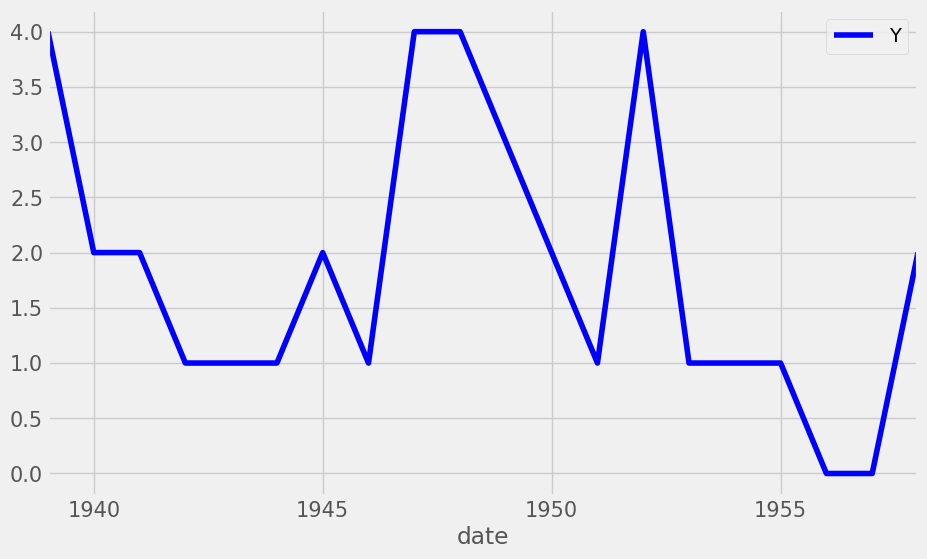

In [107]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in wer DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

#### Add vertical and horizontal markers
- Additional annotations can help further emphasize specific observations or events. Here, we will learn how to highlight significant events by adding markers at specific timestamps of wer time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

- Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating wer plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to wer plot by using the command:

- ax.axvline('1945-01-01', linestyle='--')


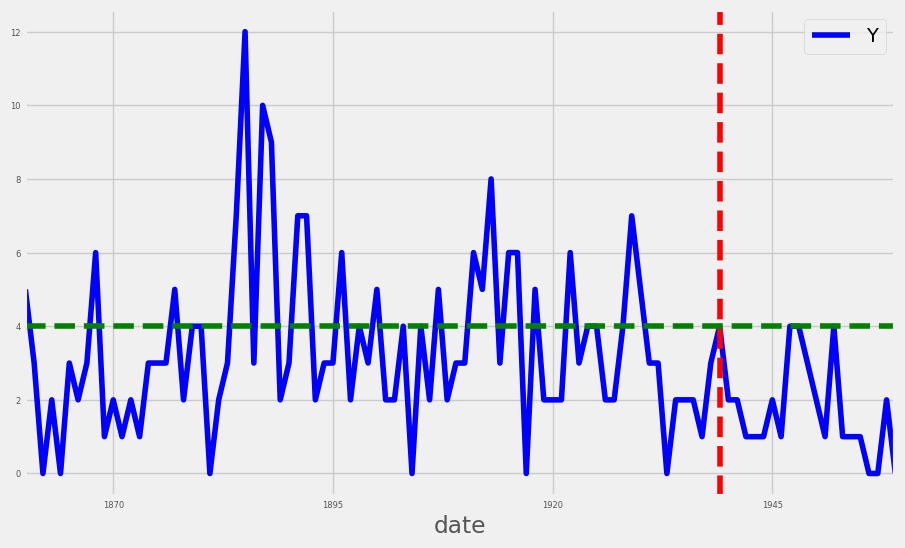

In [108]:
# Plot wer the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show()

#### Add shaded regions to wer plot
- When plotting time series data in Python, it is also possible to highlight complete regions of wer time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, we can use the command:

- ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)
Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

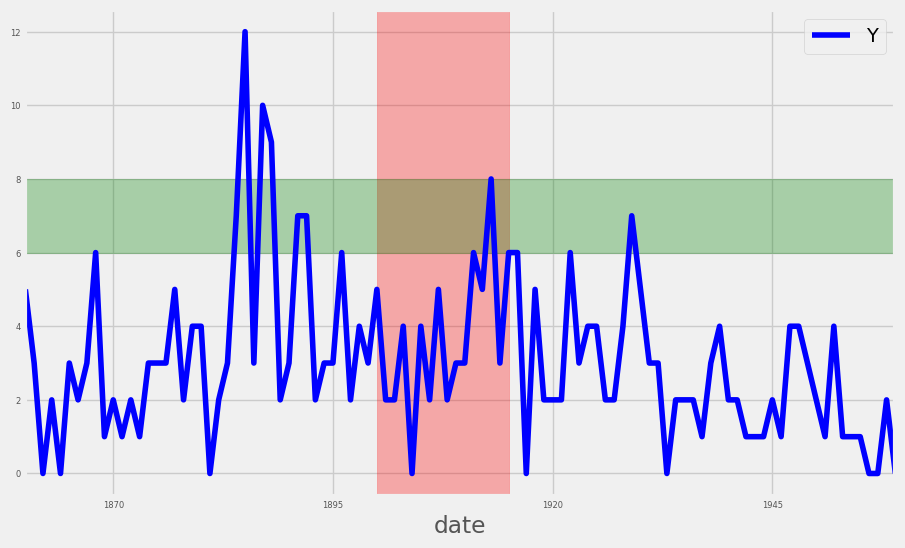

In [109]:
# Plot wer the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

#### Time series decomposition
- When visualizing time series data, we should look out for some distinguishable patterns:

- - seasonality: does the data display a clear periodic pattern?
- - trend: does the data follow a consistent upwards or downward slope?
- - noise: are there any outlier points or missing values that are not consistent with the rest of the data?
- we can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.

- decomposition = sm.tsa.seasonal_decompose(time_series)
- we can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

In [120]:
airline = pd.read_csv("ch3_airline_passengers.txt", header=0, sep=',', index_col='Month', parse_dates=True)
display(airline.head())
display(airline.tail())


AirPassengers
Month                    
1949-01-01            112
1949-02-01            118
1949-03-01            132
1949-04-01            129
1949-05-01            121

AirPassengers
Month                    
1960-08-01            606
1960-09-01            508
1960-10-01            461
1960-11-01            390
1960-12-01            432

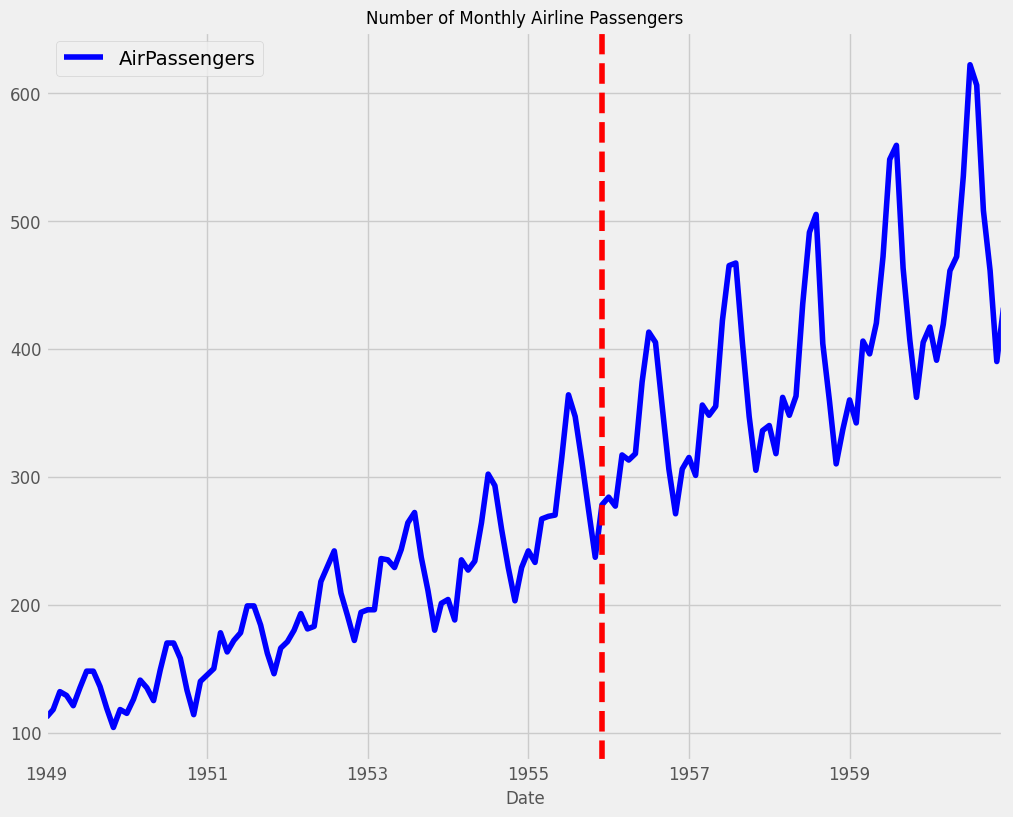

In [121]:
# Plot the time series in wer DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in wer plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

In [122]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


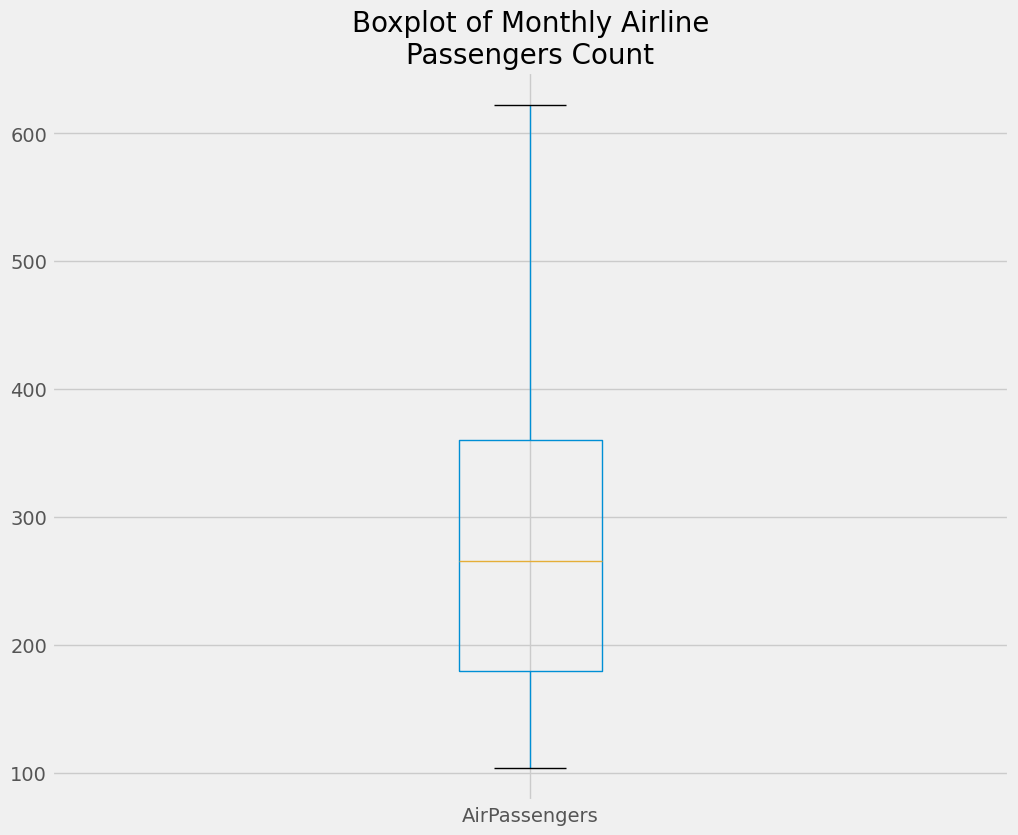

In [123]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of wer plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

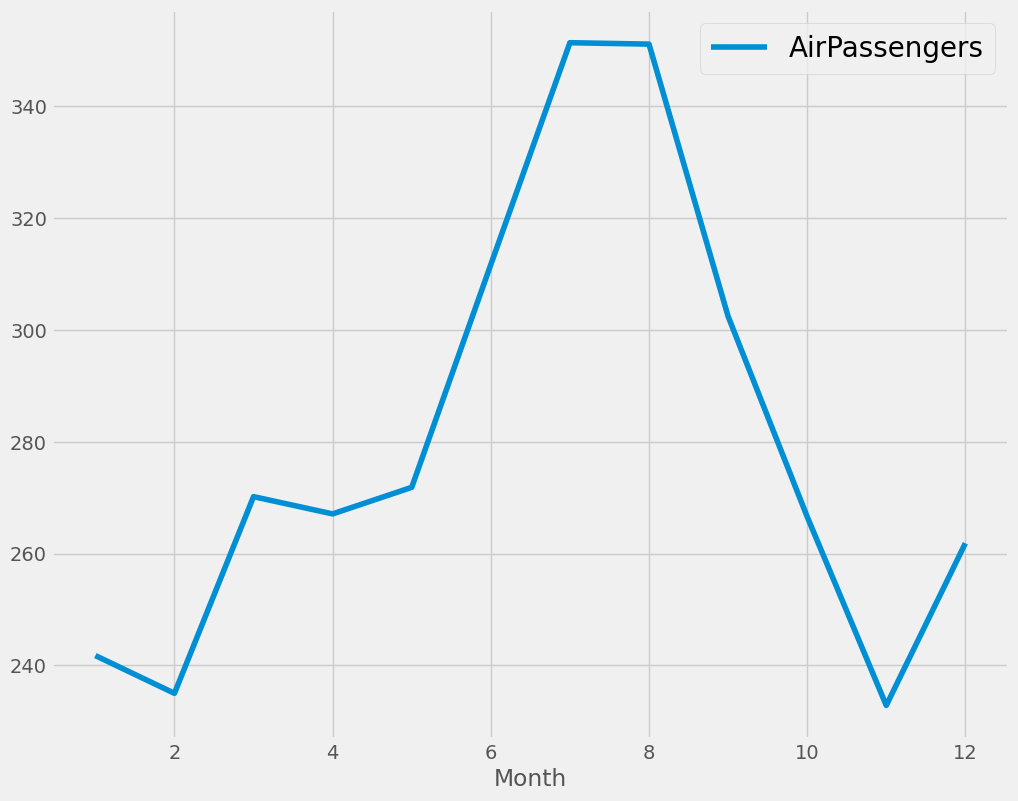

In [124]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

In [125]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal


trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313

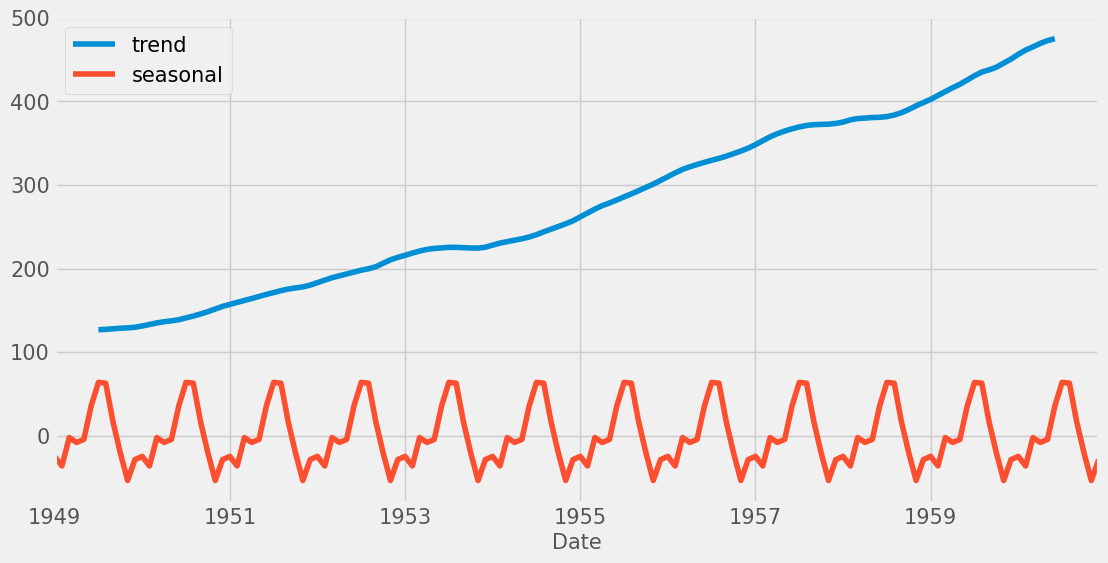

In [126]:
airline_decomposed= pd.concat([trend, seasonal], axis=1)
# Print the first 5 rows of airline_decomposed
display(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

#### Plot individual components
- It is also possible to extract other inferred quantities from wer time-series decomposition object. The following code shows we how to extract the observed, trend and noise (or residual, resid) components.

- - observed = decomposition.observed
- - trend = decomposition.trend
- - residuals = decomposition.resid
- - we can then use the extracted components and plot them individually.



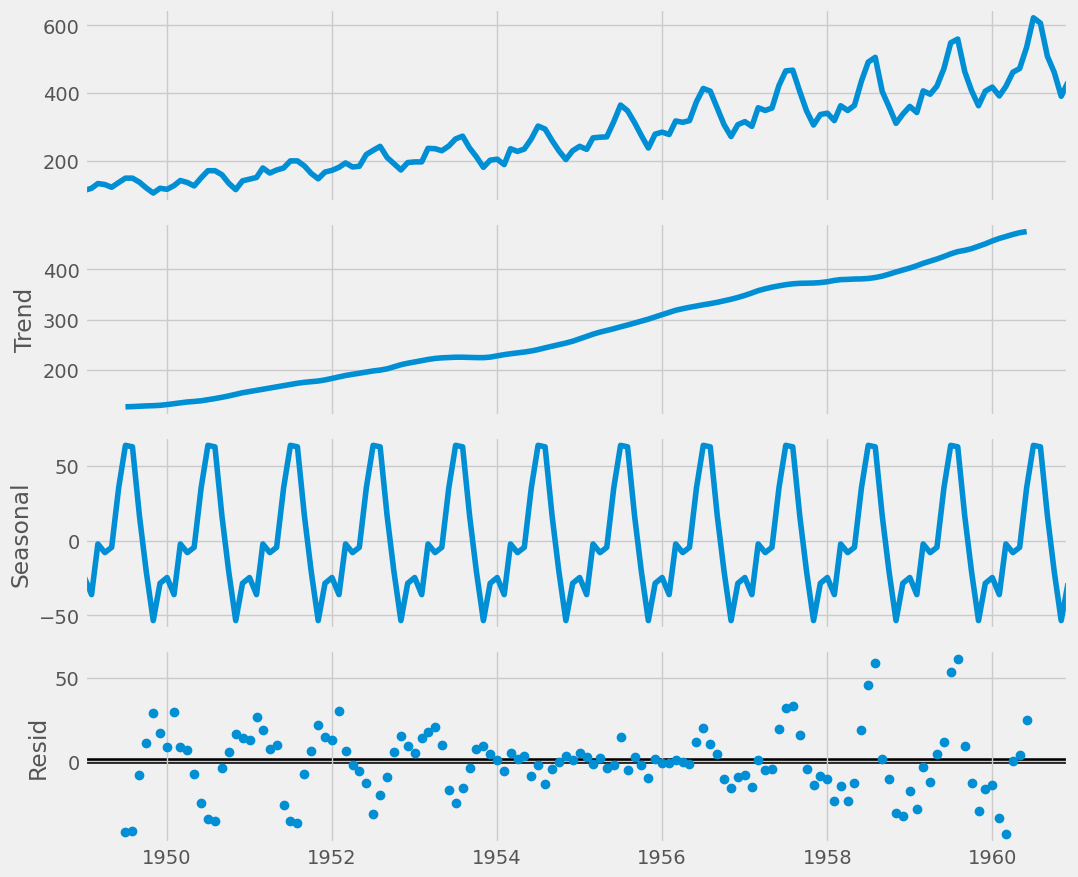

In [127]:
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from pylab import rcParams
rcParams['figure.figsize']= 11,9

fig= decomposition.plot()
plt.show()

#### The Autoregressive (AR) model
- is a linear regression model that predicts the value of a time series variable based on its own past values. The AR model of order p, denoted as AR(p), is defined by the following equation:

- - 𝑋𝑡=𝑐+𝜙1𝑋𝑡−1+𝜙2𝑋𝑡−2+…+𝜙𝑝𝑋𝑡−𝑝+𝜀𝑡 

- Where:

- - 𝑋𝑡:  is the value of the time series variable at time 𝑡
- - c:  is a constant term.
- - 𝜙1,𝜙2,…,𝜙𝑝: are the autoregressive parameters, which represent the influence of the past values of the time series on the current value.
- - 𝜀𝑡: is the error term at time t, which represents random noise or unexplained variability in the time series.
- The idea behind the AR model is to capture the linear dependence between the current value of the time series variable and its past values. By including lagged values of the variable as predictors, the AR model can capture patterns and trends in the data, allowing for forecasting future values of the time series.
- Key points about the AR model and why we use it:

- - Modeling Time Series Dependencies: The AR model captures autocorrelation between time series observations, recognizing the influence of past values on the current one.
- - Forecasting: AR model forecasts future values based on historical data by estimating autoregressive parameters.
- - Simple and Interpretable: AR model is simple and easily interpretable, offering insights into how past values affect the current value.
- -Building Blocks for More Complex Models: AR model is a foundational element for advanced time series models like ARIMA, enabling incorporation of additional components for capturing diverse time series behaviors.

#### Simulate AR(1) Time Series
- we will simulate and plot a few AR(1) time series, each with a different parameter, 
, using the arima_process module in statsmodels. we will look at an AR(1) model with a large positive 
 and a large negative 
, but feel free to play around with wer own parameters.

- When inputting the coefficients, we must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with 
, the array representing the AR parameters would be ar = np.array([1, -0.9])

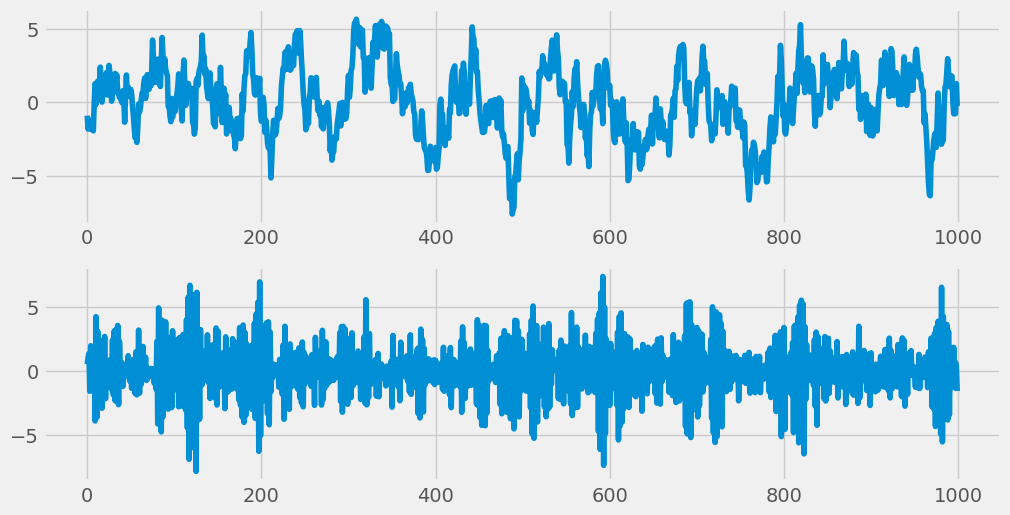

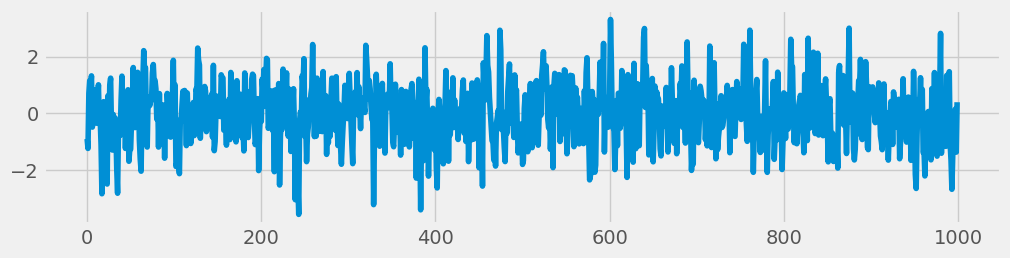

In [128]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(3,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(3,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

# Plot 2: AR parameter = 0.3
plt.subplot(3,1,3)
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)
plt.show()

#### Compare the ACF for Several AR Time Series
- The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.  A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs

- The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3

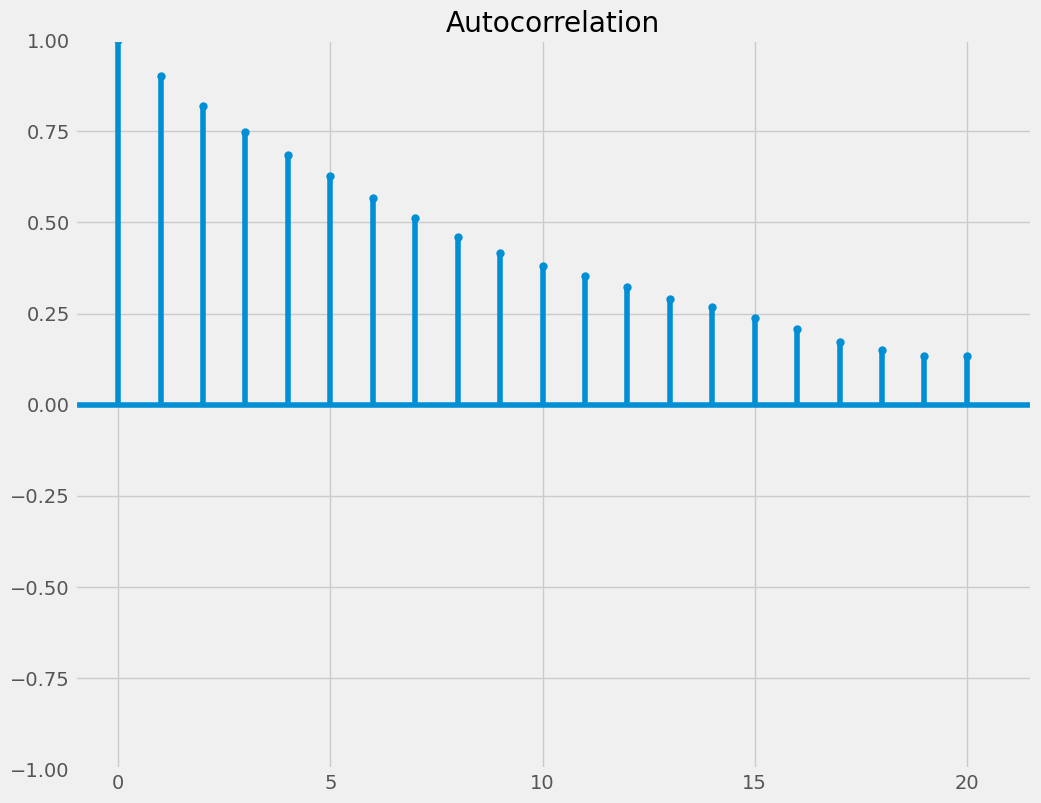

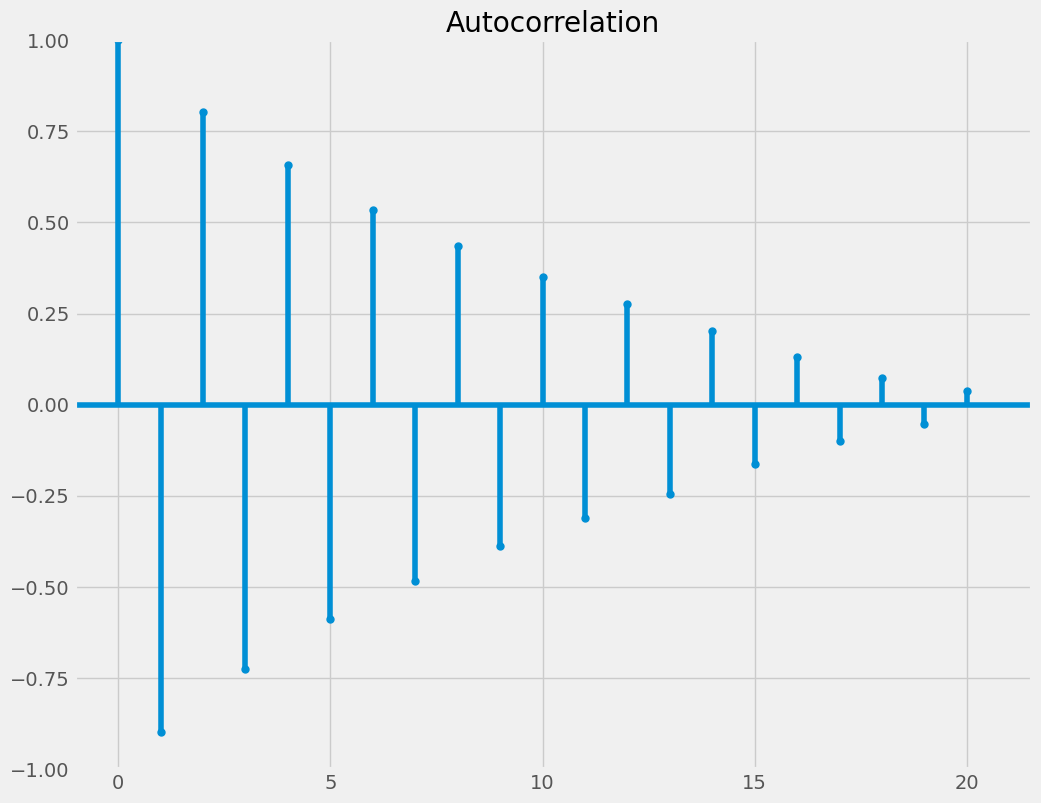

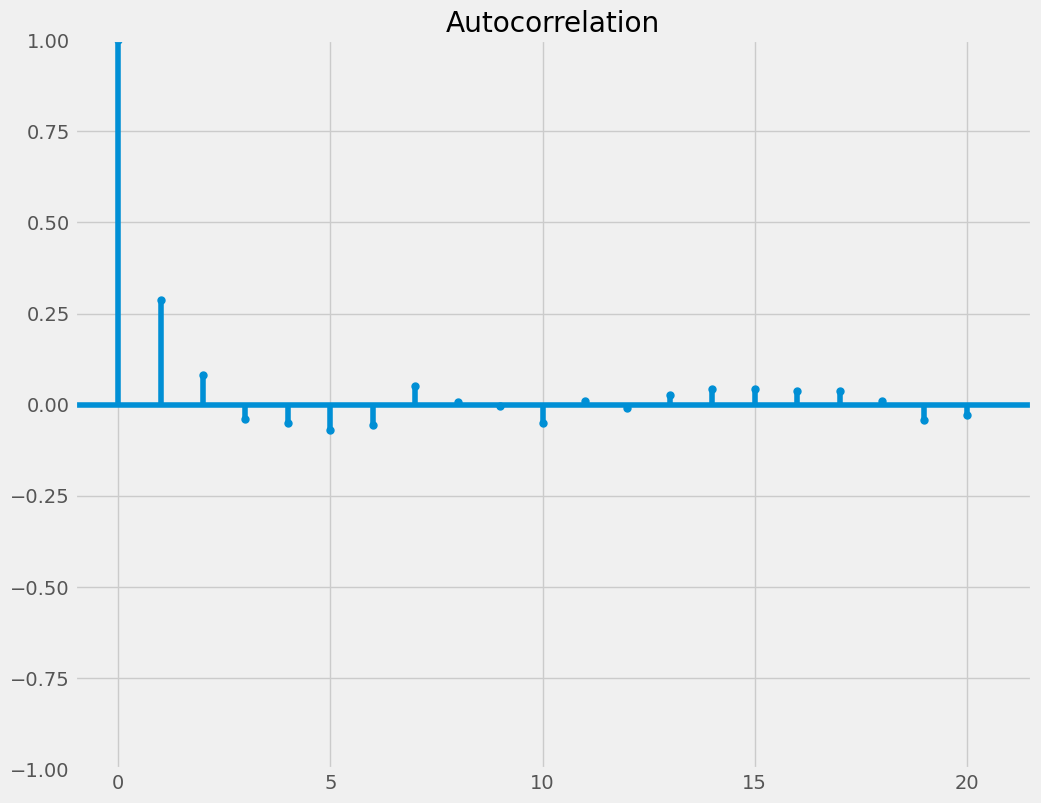

In [130]:
# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

#### Estimating an AR Model
- we will estimate the AR(1) parameter. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

- For simulated_data_1 with a true 
 of 0.9. In addition, we will also print out the entire output that is produced when we fit a time series, so we can get an idea of what other tests and summary statistics are available in statsmodels.

In [132]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Fit an AR(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for phi
print("When the true phi=0.9, the estimate of phi is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1427.308
Date:                Tue, 23 Apr 2024   AIC                           2860.616
Time:                        13:49:09   BIC                           2875.339
Sample:                             0   HQIC                          2866.212
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0486      0.320      0.152      0.879      -0.579       0.676
ar.L1          0.9006      0.014     65.352      0.000       0.874       0.928
sigma2         1.0152      0.046     22.147      0.0

#### Forecasting with an AR Model
- In addition to estimating the parameters of a model that we did in the last exercise, we can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. we can plot the forecasted data using the function plot_predict(). we supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.



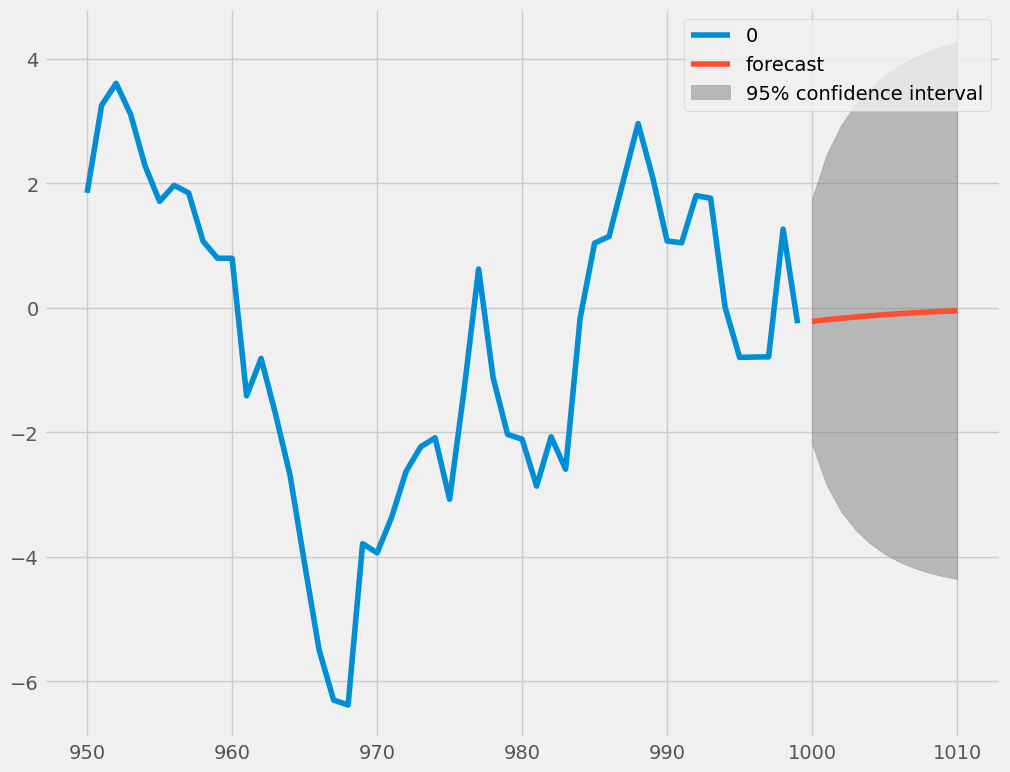

In [133]:
from statsmodels.graphics.tsaplots import plot_predict
simulated_data_1= pd.DataFrame(simulated_data_1)
simulated_data_3= pd.DataFrame(simulated_data_3)
# Forecast the first AR(1) model
mod = ARIMA(simulated_data_1, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

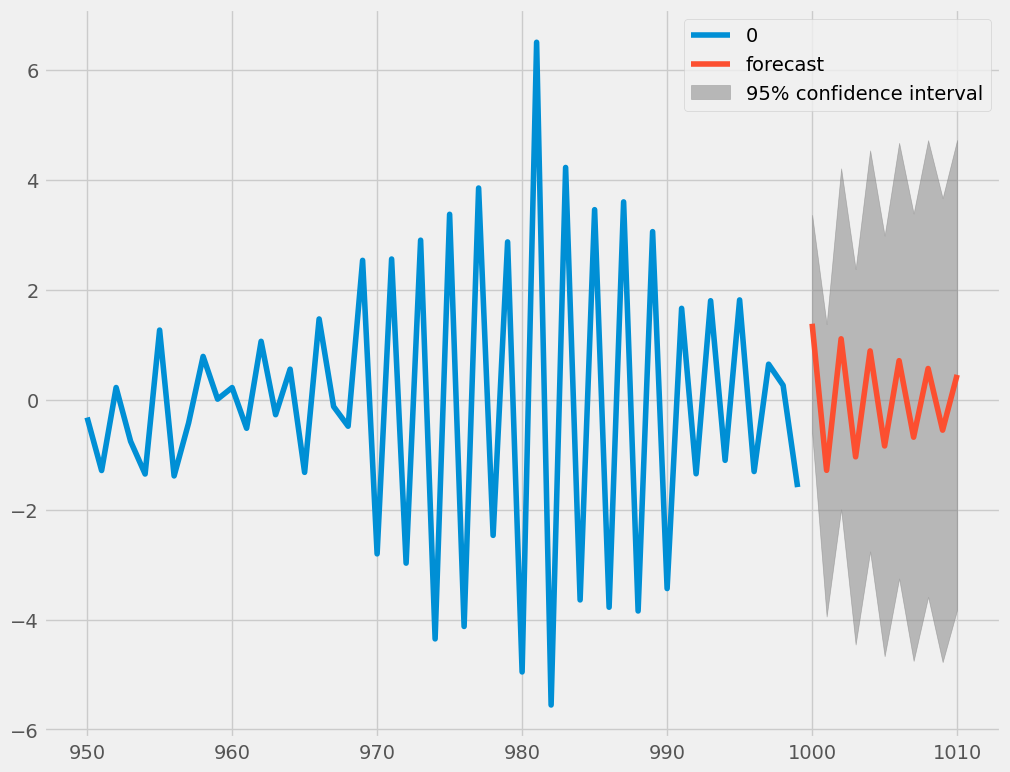

In [134]:
# Forecast the second AR(1) model
simulated_data_2 = pd.DataFrame(simulated_data_2)

mod = ARIMA(simulated_data_2, order=(1,0,0))
res = mod.fit()
# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_2.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

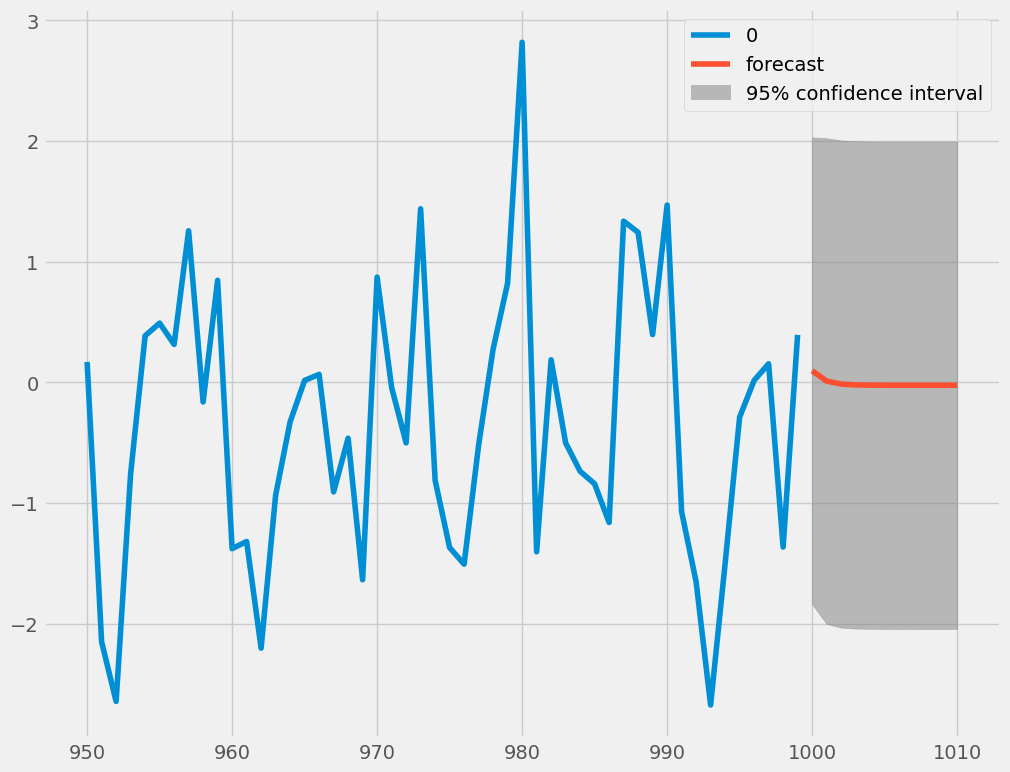

In [135]:
# Forecast the third AR(1) model
mod = ARIMA(simulated_data_3, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_3.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()

#### Let's Forecast Interest Rates
- we will now use the forecasting techniques and apply it to real data rather than simulated data. the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

- we saw that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.



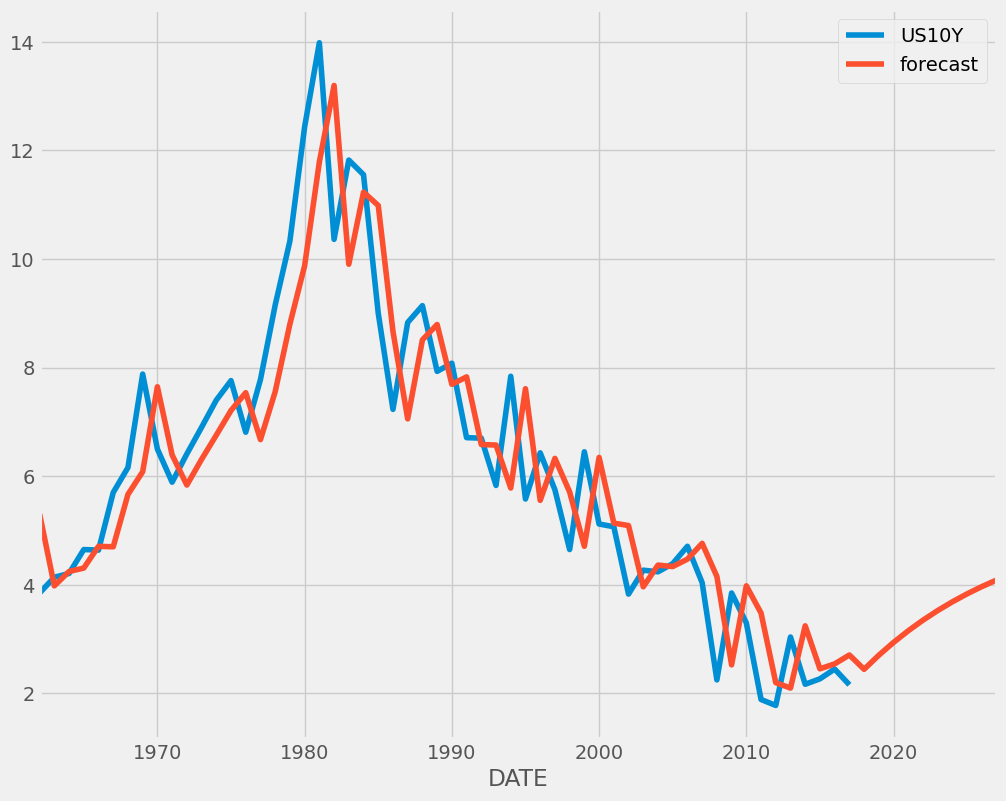

In [136]:
# Forecast interst rates using an AR(1) model
mod = ARIMA(yearly_rates, order=(1,0,0))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
yearly_rates.plot(ax=ax)
plot_predict(res, start=0, end='2027', alpha=None, ax=ax)
plt.show()

#### Compare AR Model with Random Walk
- Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. we will compare the ACF for the slightly mean-reverting interest rate series with a simulated random walk with the same number of observations.

- we should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

In [137]:
simulated_data = [5. , 4.77522278, 5.60354317, 5.96406402, 5.97965372,
       6.02771876, 5.5470751 , 5.19867084, 5.01867859, 5.50452928,
       5.89293842, 4.6220103 , 5.06137835, 5.33377592, 5.09333293,
       5.37389022, 4.9657092 , 5.57339283, 5.48431854, 4.68588587,
       5.25218625, 4.34800798, 4.34544412, 4.72362568, 4.12582912,
       3.54622069, 3.43999885, 3.77116252, 3.81727011, 4.35256176,
       4.13664247, 3.8745768 , 4.01630403, 3.71276593, 3.55672457,
       3.07062647, 3.45264414, 3.28123729, 3.39193866, 3.02947806,
       3.88707349, 4.28776889, 3.47360734, 3.33260631, 3.09729579,
       2.94652178, 3.50079273, 3.61020341, 4.23021143, 3.94289347,
       3.58422345, 3.18253962, 3.26132564, 3.19777388, 3.43527681,
       3.37204482]

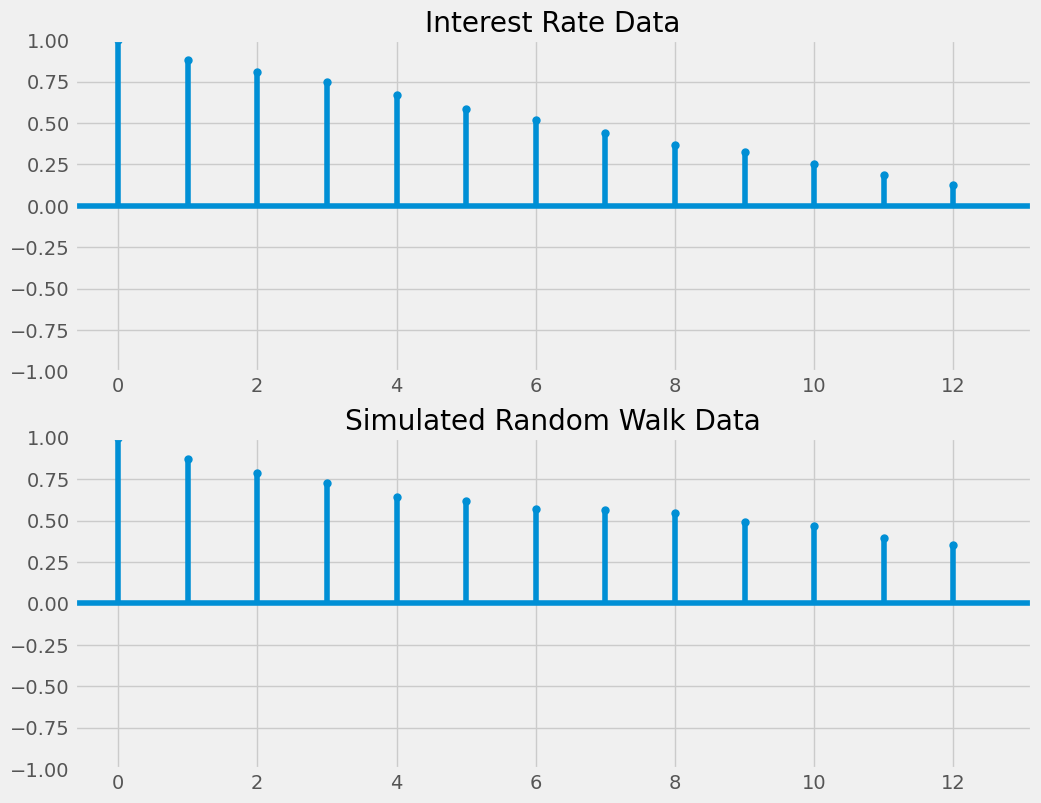

In [138]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(yearly_rates, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

#### Partial autocorrelation in time series data
- Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, …) and its own values lagged by 3 time points (t_4, t_5, t_6, …), but only after removing all effects attributable to lags 1 and 2.

- The plot_pacf() function in the statsmodels library can be used to measure and plot the partial autocorrelation of a time series.

##### Interpret partial autocorrelation plots
- If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

- The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then we can assume that the observed partial autocorrelation values are statistically significant.



#### Estimate Order of Model: PACF
- One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). we will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. we will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.



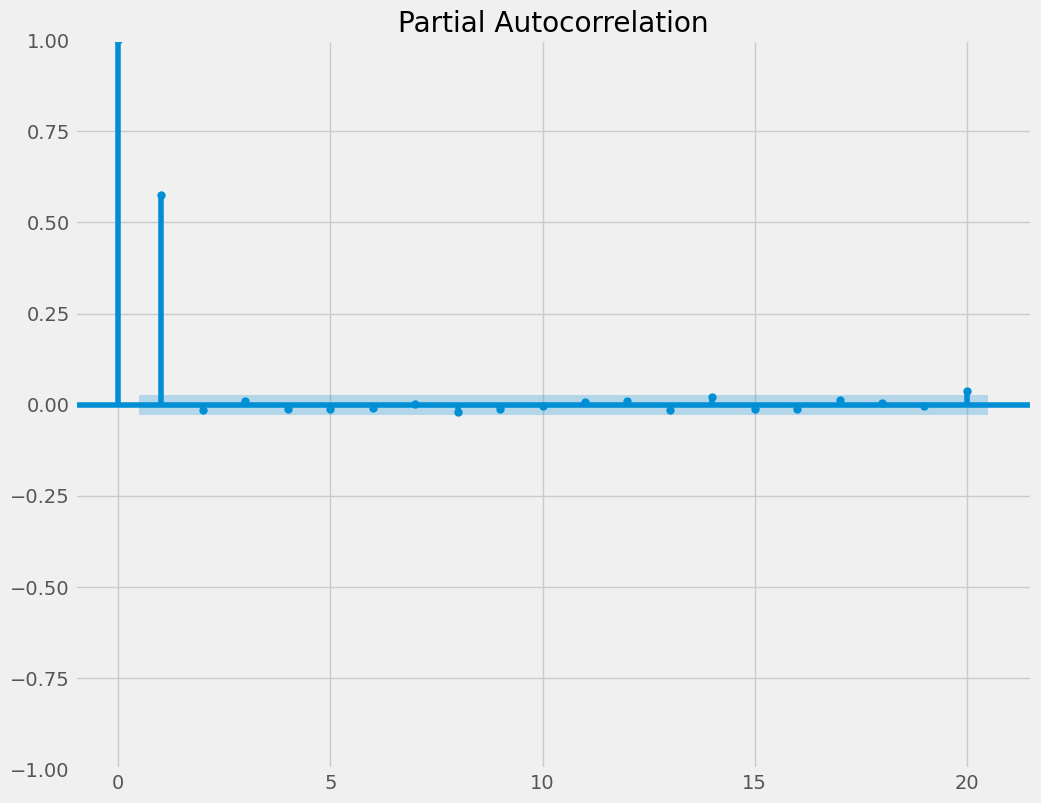

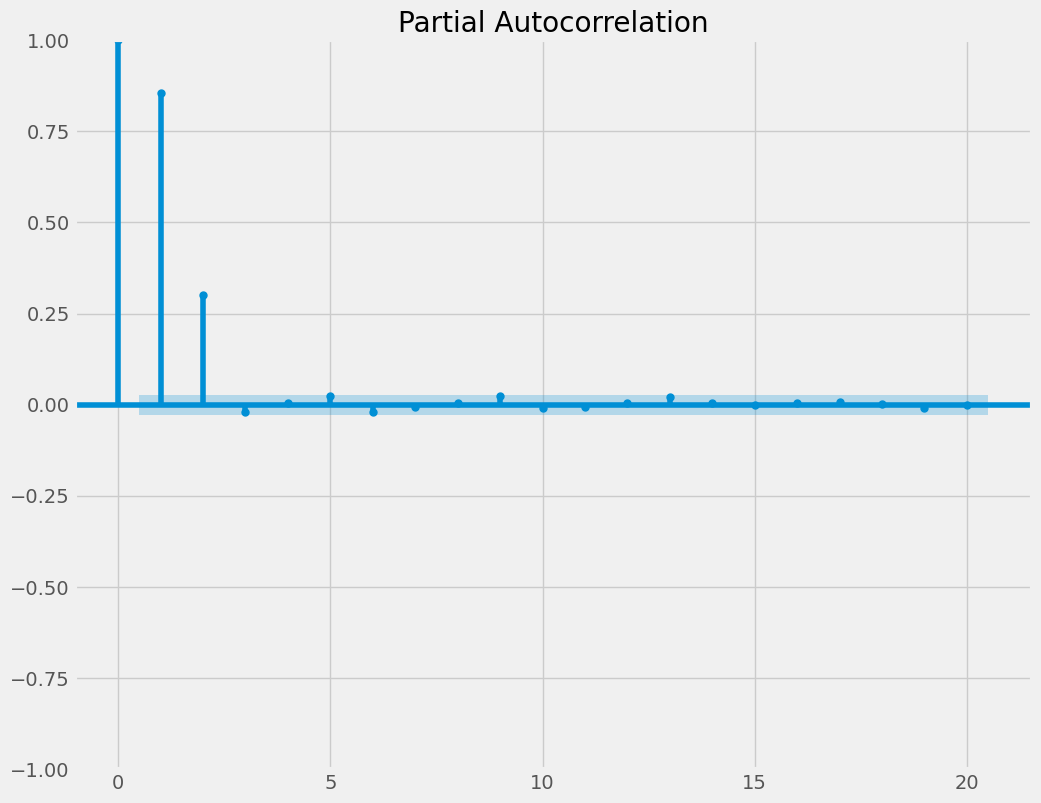

In [139]:
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

#### Estimate Order of Model: Information Criteria
- Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. we will take the AR(2) simulated data saved as simulated_data_2, and compute the BIC as we vary the order, p, in an AR(p) from 0 to 6.

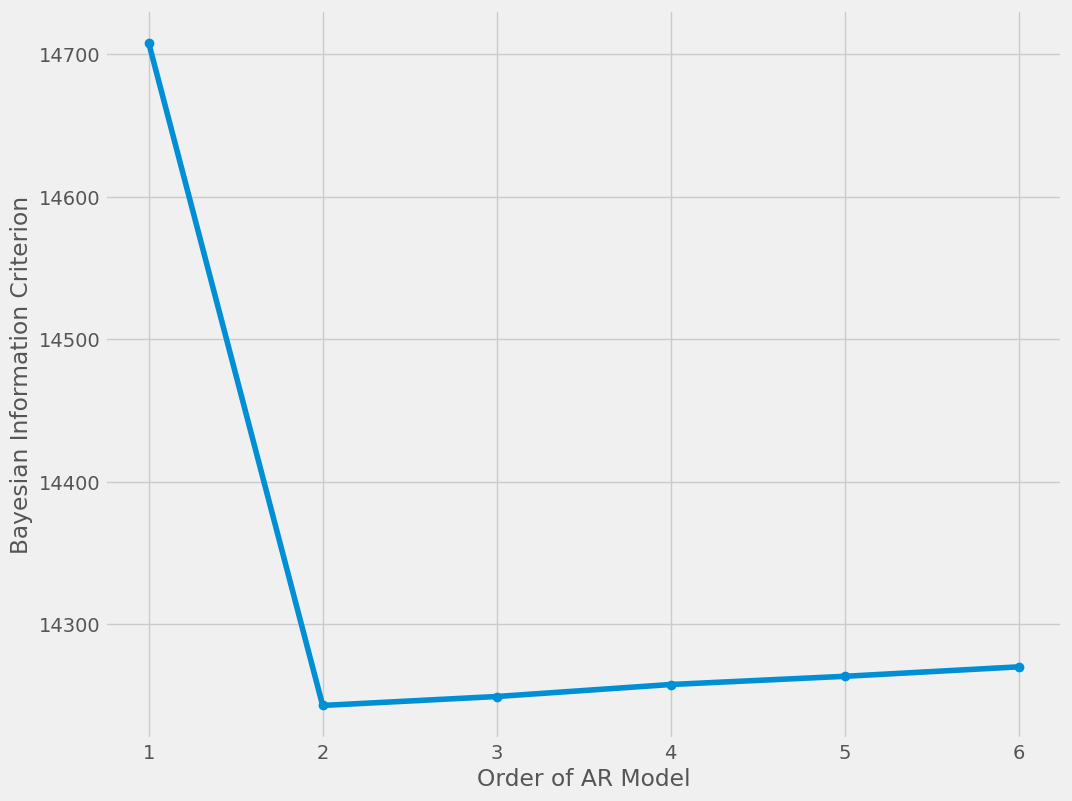

In [140]:
# Fit the data to an AR(p) for p =, and save the BIC
BIC = np.zeros(7) 
for p in range(7):
    mod = ARIMA(simulated_data_2, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

#### The Moving Average (MA) model
- is a linear regression model that predicts the value of a time series variable based on the weighted sum of its past forecast errors. The MA model of order q, denoted as MA(q), is defined by the following equation:

- - 𝑋𝑡=𝜇+𝜀𝑡+𝜃1𝜀𝑡−1+𝜃2𝜀𝑡−2+…+𝜃𝑞𝜀𝑡−𝑞​
- where :
- - Xt: is the value of the time series variable at time 
- - μ: is the mean of the time series.
- - 𝜀𝑡: is the white noise error term at time t, which represents random shocks or unexplained variability in the time series.
- - 𝜃1,𝜃2,…,𝜃𝑞: are the moving average parameters, which represent the weights applied to the past forecast errors.
- The idea behind the MA model is to capture the linear dependence between the current value of the time series variable and its past forecast errors. By including lagged forecast errors as predictors, the MA model can capture short-term shocks or disturbances in the data, allowing for improved forecasting of future values of the time series.
- Key points about the MA model and why we use it:

- - Modeling Short-Term Shocks: MA model captures short-term fluctuations by weighting past forecast errors.
- - Forecasting: MA model predicts future values using past forecast errors, aiding short-term fluctuation forecasts.
- - Complementary to AR Model: MA model complements AR model, capturing different time series aspects, forming basis for complex models like ARIMA.
- - Simple and Efficient: MA model is straightforward and computationally efficient, facilitating interpretation and forecasting tasks.

#### Simulate MA(1) Time Series
- we will simulate and plot a few MA(1) time series, each with a different parameter, 
, using the arima_process module in statsmodels, just as we did for AR(1) models. we will look at an MA(1) model with a large positive 
 and a large negative 

- when inputting the coefficients, we must include the zero-lag coefficient of 1, but unlike the AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with 
, the array representing the MA parameters would be ma = np.array([1, -0.9])

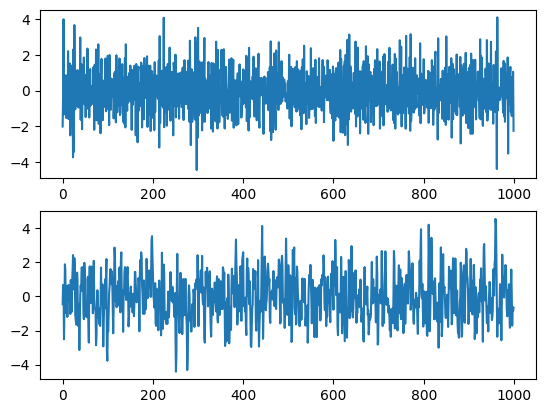

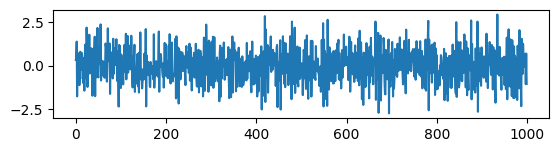

In [143]:
plt.style.use('default')
# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

# Plot 3: MA parameter = -0.3
plt.subplot(3,1,3)
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(simulated_data_3)

plt.show()

#### Compute the ACF for Several MA Time Series

- we will verify these autocorrelation functions for the three time series 

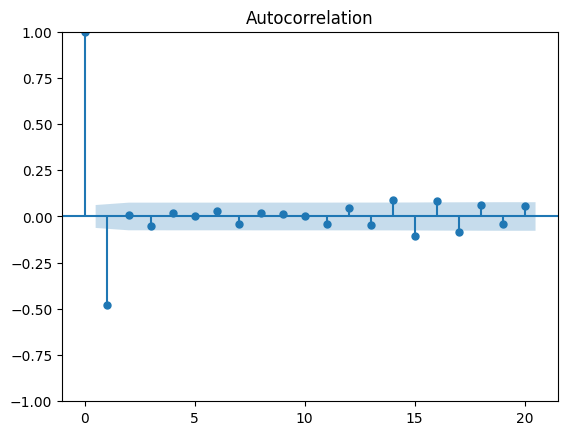

In [144]:
# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

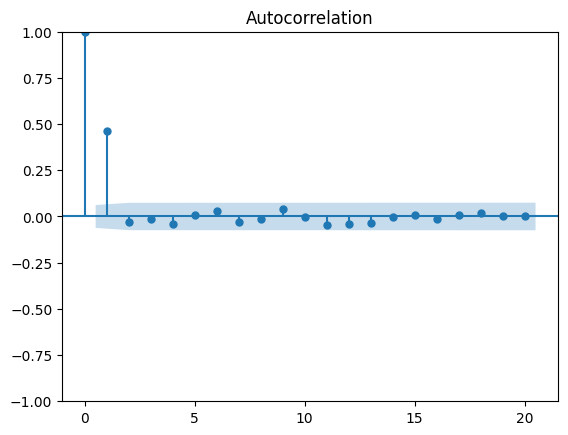

In [145]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

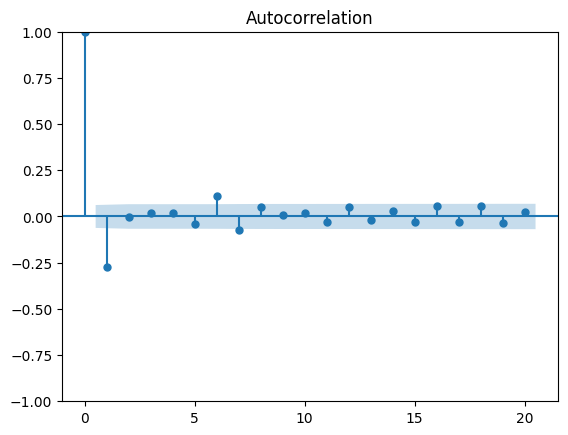

In [146]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

#### Estimating an MA Model
- we will estimate the MA(1) parameter, 
, of one of the simulated series. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

- For simulated_data_1 with a true 
 of -0.9. In addition, we will also print out the entire output that is produced when we fit a time series, so we can get an idea of what other tests and summary statistics are available in statsmodels.

In [147]:
# Fit an MA(1) model to the first simulated data
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta is:")
print(res.params[1])

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1393.916
Date:                Tue, 23 Apr 2024   AIC                           2793.832
Time:                        14:10:44   BIC                           2808.555
Sample:                             0   HQIC                          2799.428
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0038      0.003     -1.160      0.246      -0.010       0.003
ma.L1         -0.8954      0.015    -57.778      0.000      -0.926      -0.865
sigma2         0.9497      0.045     21.287      0.0

#### Forecasting with MA Model
- As we did with AR models, we will use MA models to forecast in-sample and out-of-sample data using the plot_predict() function in statsmodels.
- For the simulated series simulated_data_1, we will plot in-sample and out-of-sample forecasts. One big difference we will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

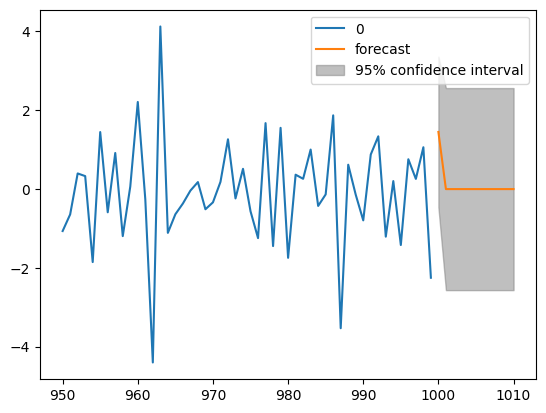

In [148]:
simulated_data_1 = pd.DataFrame(simulated_data_1)
# Forecast the first MA(1) model
mod = ARIMA(simulated_data_1, order=(0,0,1))
res = mod.fit()

# Plot the data and the forecast
fig, ax = plt.subplots()
simulated_data_1.loc[950:].plot(ax=ax)
plot_predict(res, start=1000, end=1010, ax=ax)
plt.show()


#### Cointegration 
- is a statistical concept used in time series analysis to describe the long-term relationship between two or more non-stationary time series variables. When two or more time series are cointegrated, they share a common stochastic trend, meaning that while each series may individually exhibit random fluctuations, there exists a linear combination of them that is stationary.

- The idea of cointegration:
- - Identifying Long-Term Relationships: Cointegration reveals enduring connections between variables, despite short-term fluctuations, aiding in understanding their collective behavior over time.
- - Improving Forecasting Accuracy: Recognizing cointegrated relationships enhances predictive models, particularly in capturing co-movements of variables, leading to more accurate forecasts.
- - Developing Trading Strategies: Cointegration informs pairs trading strategies by identifying assets whose deviations from a long-term relationship are expected to revert, offering profit opportunities.
- - Strengthening Statistical Analysis: Cointegration tests provide robust statistical tools, validating hypotheses about variable relationships and ensuring reliable inferences.
- - Distinguishing Spurious Correlations: Cointegration discerns genuine relationships from spurious correlations, preventing misleading conclusions drawn from chance or random fluctuations.
- - Modeling Complex Systems: Understanding cointegrated variables allows for more comprehensive modeling of complex systems, capturing interconnected dynamics with greater fidelity.

#### A Dog on a Leash? (Part 1)
- The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. First, plot both price series, which look like random walks. Then plot the difference between the two series, which should look more like a mean reverting series (to put the two series in the same units, we multiply the heating oil prices, in $/gallon, by 7.25, which converts it to $/millionBTU, which is the same units as Natural Gas).

- The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) was obtained from Quandl.

In [149]:
HO = pd.read_csv("CME_HO1.csv", index_col='Date', parse_dates= True)
NG = pd.read_csv("CME_NG1.csv", index_col='Date', parse_dates= True)
HO = HO.sort_index(ascending=True)
NG = NG.sort_index(ascending=True)

display(HO.head())
display("#"*50)
display(NG.head())
display("#"*50)
display(HO.info())
display("#"*50)
display(NG.info())

Close
Date              
1991-01-02  0.7330
1991-01-03  0.7024
1991-01-04  0.6830
1991-01-07  0.7617
1991-01-08  0.7430

'##################################################'

Close
Date             
1991-01-02  1.832
1991-01-03  1.782
1991-01-04  1.743
1991-01-07  1.785
1991-01-08  1.786

'##################################################'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3754 entries, 1991-01-02 to 2005-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3754 non-null   float64
dtypes: float64(1)
memory usage: 58.7 KB


None

'##################################################'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3754 entries, 1991-01-02 to 2005-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3754 non-null   float64
dtypes: float64(1)
memory usage: 58.7 KB


None

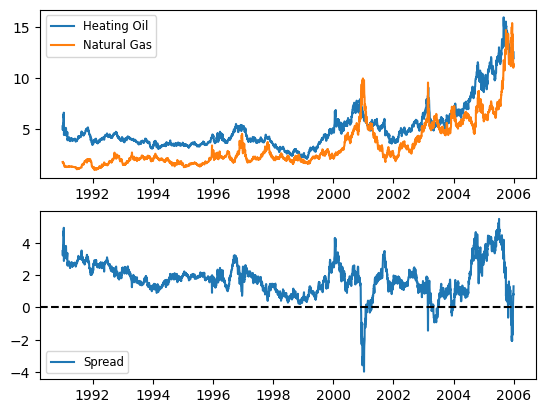

In [150]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

#### A Dog on a Leash? (Part 2)
- To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller test separately to show they are random walks. Then apply the test to the difference, which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG.

In [151]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.9567108785017873
The p-value for the ADF test on NG is  0.9008747444676731
The p-value for the ADF test on the spread is  7.019439302142298e-05
